In [235]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import re

In [184]:
df=pd.read_csv('vgsales-12-4-2019-short.csv')
scores_df=pd.read_csv('result.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [185]:
df.isnull().mean()

Rank             0.000000
Name             0.000000
Genre            0.000000
ESRB_Rating      0.576588
Platform         0.000000
Publisher        0.000000
Developer        0.000305
Critic_Score     0.882851
User_Score       0.993996
Total_Shipped    0.967253
Global_Sales     0.652011
NA_Sales         0.767637
PAL_Sales        0.763604
JP_Sales         0.873763
Other_Sales      0.721788
Year             0.017547
dtype: float64

In [186]:
df.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000


In [187]:
scores_df.columns=['metascore','Name','console','userscore','date']
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15647 entries, 0 to 15646
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metascore  15647 non-null  int64 
 1   Name       15647 non-null  object
 2   console    15647 non-null  object
 3   userscore  15647 non-null  object
 4   date       15647 non-null  object
dtypes: int64(1), object(4)
memory usage: 611.3+ KB


In [188]:
scores_df['year']=scores_df['date'].apply(lambda x: int(x[-4:]))
scores_df['year'].head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: int64

In [189]:
scores_df.describe()

,metascore,year
count,15647.000000,15647.000000
mean,70.012207,2009.632901
std,12.633671,5.249650
min,11.000000,2000.000000
25%,63.000000,2005.000000
50%,72.000000,2010.000000
75%,79.000000,2014.000000
max,98.000000,2018.000000


In [190]:
df2=df.copy()

In [191]:
# Drop rows with null Global Sales and columns that are unnecessary
df2.dropna(subset=['Global_Sales'],inplace=True)
df2.drop(columns=['Total_Shipped','NA_Sales','PAL_Sales','JP_Sales','Other_Sales'],inplace=True)

In [192]:
# Filter out all games released before 2000 because score data is only 2000+
df2=df2[~(df2['Year']<2000)]

In [193]:

df2.describe()

,Rank,Critic_Score,User_Score,Global_Sales,Year
count,17649.000000,3993.000000,164.000000,17649.000000,17611.000000
mean,11426.067426,7.136063,8.256707,0.353245,2008.871501
std,6032.855356,1.414887,1.231495,0.842367,4.719384
min,20.000000,1.000000,2.000000,0.000000,2000.000000
25%,6205.000000,6.400000,7.875000,0.030000,2005.000000
50%,11814.000000,7.400000,8.500000,0.110000,2009.000000
75%,16706.000000,8.200000,9.100000,0.340000,2012.000000
max,21242.000000,10.000000,10.000000,20.320000,2020.000000


In [194]:
print(df2['Platform'].sort_values().unique())
scores_df['console'].sort_values().unique()

['3DS' 'DC' 'DS' 'GB' 'GBA' 'GBC' 'GC' 'Mob' 'N64' 'NES' 'NS' 'OSX' 'PC'
 'PS' 'PS2' 'PS3' 'PS4' 'PSN' 'PSP' 'PSV' 'SAT' 'VC' 'WS' 'WW' 'Wii'
 'WiiU' 'X360' 'XB' 'XBL' 'XOne']


array([' PC', ' VITA', '3DS', 'DC', 'DS', 'GBA', 'GC', 'N64', 'PC', 'PS',
       'PS2', 'PS3', 'PS4', 'PSP', 'Switch', 'VITA', 'WII', 'WIIU',
       'X360', 'XBOX', 'XONE'], dtype=object)

In [195]:
#Normalize Console names between both datframes before merge
console_names={'NS': 'Switch',
               'PSV': 'VITA',
               'Wii': 'WII',
               'WiiU': 'WIIU',
               'XB': 'XBOX',
               'XOne': 'XONE'
              }
df2['console']=df2['Platform'].replace(console_names)
df2['console'].sort_values().unique()

#Clean and strip extra spaces in console names for score data
scores_df['console'].replace(to_replace=' ',value='', inplace=True, regex=True)
scores_df['console'].sort_values().unique()

array(['3DS', 'DC', 'DS', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'Switch', 'VITA', 'WII', 'WIIU', 'X360', 'XBOX',
       'XONE'], dtype=object)

In [177]:
# Normalize numeral/number in Names
numeral_dict={
    ' II($|\s)': ' 2\\1',
    ' III($|\s)': ' 3\\1',
    ' IV($|\s)': ' 4\\1',
    ' V($|\s)': ' 5\\1',
    ' VI($|\s)': ' 6\\1',
    ' VII($|\s)': ' 7\\1',
    ' VIII($|\s)': ' 8\\1',
    ' IX($|\s)': ' 9\\1',
    ' XI($|\s)': ' 11\\1',
    ' XII($|\s)': ' 12\\1',
    ' XIII($|\s)': ' 13\\1',
    ' XIV($|\s)': ' 14\\1',
    ' XV($|\s)': ' 15\\1'
}

scores_df['Name'].replace(numeral_dict,regex=True, inplace=True)
df2['Name'].replace(numeral_dict,regex=True, inplace=True)

In [196]:
# Make all names uppercase so case will not affect name matching
df2['Name']=df2['Name'].apply(lambda x: x.upper())
scores_df['Name']=scores_df['Name'].apply(lambda x: x.upper())

# Normalize various options for 'and'
misc_names={
    'AND': '+',
    '&': '+'
}

scores_df['Name'].replace(misc_names,regex=True, inplace=True)
df2['Name'].replace(misc_names,regex=True, inplace=True)

In [200]:
# Remove all punctuation and spaces from names
df2['Name']=df2['Name'].str.replace(r'[\W]+','')
scores_df['Name']=scores_df['Name'].str.replace(r'[\W]+','')


In [205]:
len(df2['Name'].unique())
len(scores_df['Name'].unique())

10385

In [206]:
sale_scores=pd.merge(df2,scores_df,on=['Name','console'])

In [207]:
sale_scores.isnull().mean()

Rank            0.000000
Name            0.000000
Genre           0.000000
ESRB_Rating     0.059208
Platform        0.000000
Publisher       0.000000
Developer       0.000000
Critic_Score    0.599453
User_Score      0.982404
Global_Sales    0.000000
Year            0.000000
console         0.000000
metascore       0.000000
userscore       0.000000
date            0.000000
year            0.000000
dtype: float64

In [208]:
sale_scores[sale_scores['Year']!=sale_scores['year']]

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Global_Sales,Year,console,metascore,userscore,date,year
47,156,REDDEADREDEMPTION,Action,M,PS3,Rockstar Games,Rockstar San Diego,9.5,NaN,6.57,2011.0,PS3,95,8.9,"May 18, 2010",2010
107,313,THEELDERSCROLLSIVOBLIVION,Role-Playing,M,X360,Take-Two Interactive,Bethesda Softworks,9.2,NaN,4.47,2009.0,X360,94,8.7,"Mar 20, 2006",2006
240,548,BORDERLS2,Shooter,NaN,X360,2K Games,Gearbox Software,NaN,NaN,3.06,2013.0,X360,89,8.3,"Sep 18, 2012",2012
411,906,PLAYERUNKNOWNSBATTLEGROUNDS,Shooter,T,XOne,Microsoft Studios,PUBG Corporation,NaN,NaN,2.17,2017.0,XONE,86,5.6,"Sep 4, 2018",2018
454,1001,ROCKETLEAGUE,Sports,E,PS4,505 Games,Psyonix Studios,8.7,NaN,2.02,2016.0,PS4,85,8.6,"Jul 7, 2015",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,20387,SILENTHILL3,Adventure,M,PC,Konami,Team Silent,NaN,NaN,0.00,2003.0,PC,72,8.8,"Apr 6, 2004",2004
8131,20477,TEAMFORTRESS2,Shooter,M,PC,Valve,Valve Corporation,9.2,NaN,0.00,2008.0,PC,92,9.1,"Oct 10, 2007",2007
8308,20915,EUROPAUNIVERSALISIV,Strategy,T,PC,Paradox Interactive,Paradox Development,NaN,NaN,0.00,2014.0,PC,87,8.8,"Aug 13, 2013",2013
8335,20991,THEBOOKOFUNWRITTENTALES2,Adventure,NaN,PC,Nordic Games,KING Art Games,NaN,NaN,0.00,2014.0,PC,80,7.6,"Feb 20, 2015",2015


In [232]:
sale_scores['userscore']= np.where(sale_scores['userscore']=='tbd',np.nan,sale_scores['userscore'])
sale_scores['userscore']=sale_scores['userscore'].astype('float64')
sale_scores['userscore'].fillna(sale_scores['userscore'].mean(), inplace=True)

C:\Users\Drago\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [225]:
sale_scores['month']=sale_scores['date'].apply(lambda x: x[0:3])
sale_scores['month'].unique()

array(['Sep', 'Nov', 'Oct', 'Apr', 'Jun', 'May', 'Mar', 'Aug', 'Jan',
       'Feb', 'Dec', 'Jul'], dtype=object)

In [267]:
# sale_scores['date']=pd.to_datetime(sale_scores['date'], format='%b %d, %Y')
# sale_scores['month']=pd.DatetimeIndex(sale_scores['date']).month


Int64Index([ 9, 11, 10,  9, 11, 11, 10, 11, 11, 11,
            ...
            10,  5, 11, 10,  3,  3,  7,  3,  4,  3],
           dtype='int64', name='date', length=8411)

In [211]:
# Remove largely incomplete(Critic and User Score) and repetitive columns
sale_scores=sale_scores.drop(columns=['Critic_Score','User_Score','Platform','Year'])

In [202]:
len(pd.merge(df2,scores_df,on=['Name','console'])['Name'].unique())

5304

## EDA and some Visualization

In [269]:
sale_scores['yrs_old']=2018-sale_scores['year']
sale_scores['yrs_old']

0        5
1        4
2       16
3        5
4        7
        ..
8406    11
8407    11
8408    15
8409    16
8410     9
Name: yrs_old, Length: 8411, dtype: int64

In [270]:
sale_scores.describe()

,Rank,Global_Sales,metascore,userscore,year,yrs_old
count,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000
mean,9136.489359,0.546862,69.658542,7.105700,2008.065153,9.934847
std,5857.525272,1.101574,12.961552,1.316097,4.813308,4.813308
min,20.000000,0.000000,17.000000,0.400000,2000.000000,0.000000
25%,4046.500000,0.070000,62.000000,6.600000,2004.000000,7.000000
50%,8461.000000,0.210000,71.000000,7.300000,2007.000000,11.000000
75%,13740.000000,0.570000,79.000000,8.000000,2011.000000,14.000000
max,21242.000000,20.320000,98.000000,9.400000,2018.000000,18.000000


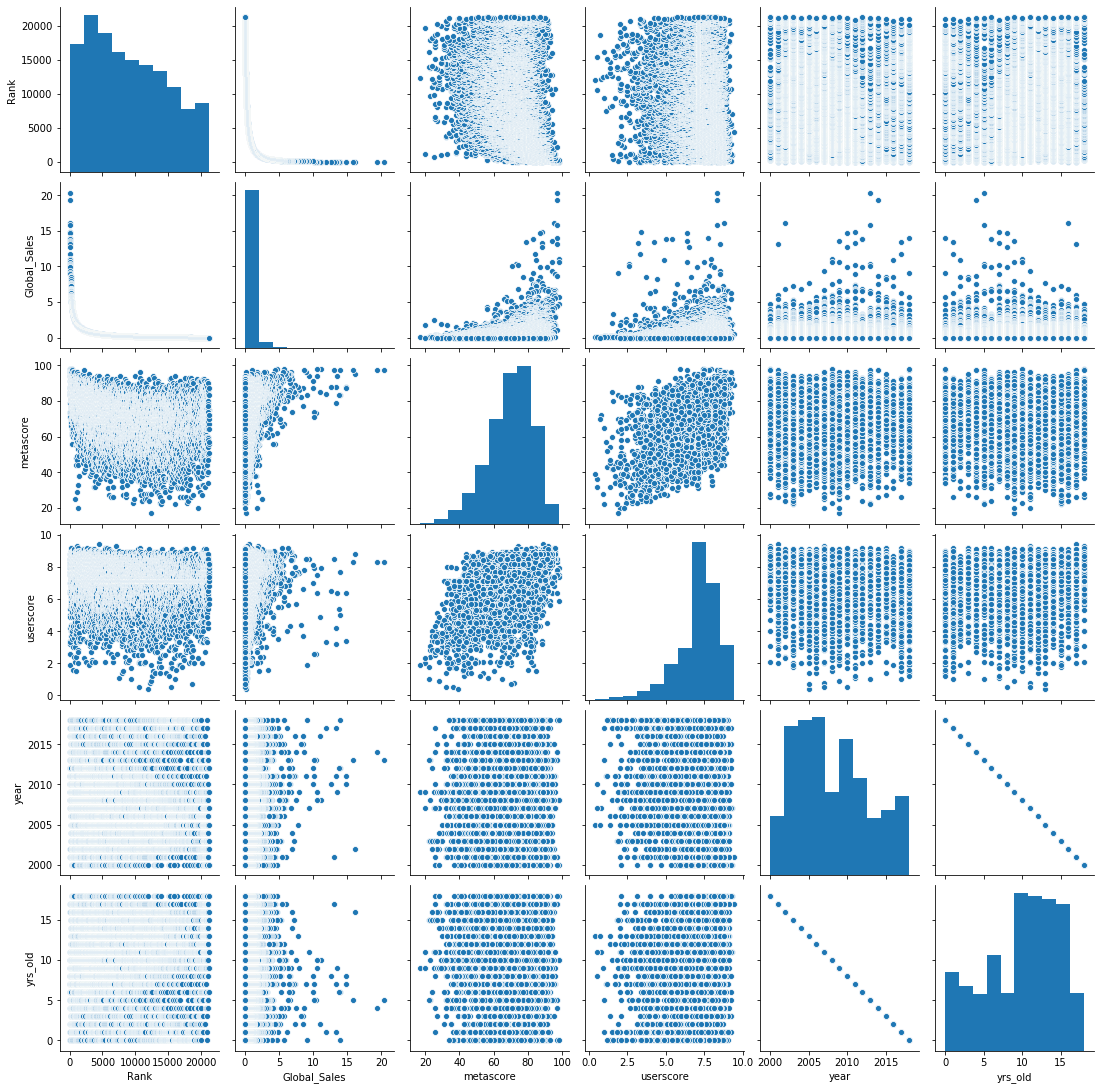

In [271]:
sns.pairplot(sale_scores)

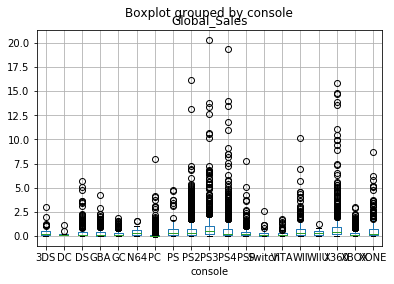

In [238]:
sale_scores.boxplot(column='Global_Sales',by='console')

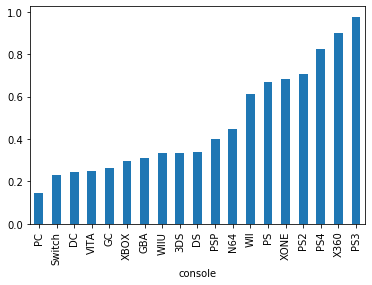

In [245]:
sale_scores.groupby('console')['Global_Sales'].mean().sort_values().plot(kind='bar')

In [247]:
sale_scores.groupby('console')['Name'].count().sort_values(ascending=False)

console
PS2       1251
PC         943
X360       867
PS3        779
XBOX       733
PS4        587
DS         571
WII        486
PSP        437
GC         396
GBA        376
XONE       330
3DS        188
VITA       137
Switch     125
PS         104
WIIU        67
N64         21
DC          13
Name: Name, dtype: int64

In [241]:
consoles=sale_scores['console'].unique()
## One-way ANOVA
test_stat,p_value=stats.f_oneway(
    sale_scores['Global_Sales'][sale_scores['console']==consoles[0]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[1]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[2]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[3]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[4]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[5]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[6]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[7]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[8]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[9]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[10]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[11]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[12]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[13]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[14]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[15]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[16]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[17]],
    sale_scores['Global_Sales'][sale_scores['console']==consoles[18]]
)
print(test_stat,p_value)
# Determine the critical value for the 95% confidence interval.
sig=.05

# Evaluate the test statistic agains the critical value.
if p_value<=sig:
    print('Reject null')
else:
    print('Fail to reject null')

32.303607411774756 6.369802634409334e-108
Reject null


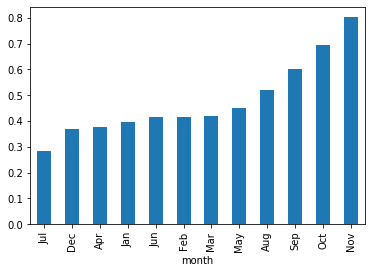

In [268]:
sale_scores.groupby('month')['Global_Sales'].mean().sort_values().plot(kind='bar')

In [272]:
months=sale_scores['month'].unique()
## One-way ANOVA
test_stat,p_value=stats.f_oneway(
    sale_scores['Global_Sales'][sale_scores['month']==months[0]],
    sale_scores['Global_Sales'][sale_scores['month']==months[1]],
    sale_scores['Global_Sales'][sale_scores['month']==months[2]],
    sale_scores['Global_Sales'][sale_scores['month']==months[3]],
    sale_scores['Global_Sales'][sale_scores['month']==months[4]],
    sale_scores['Global_Sales'][sale_scores['month']==months[5]],
    sale_scores['Global_Sales'][sale_scores['month']==months[6]],
    sale_scores['Global_Sales'][sale_scores['month']==months[7]],
    sale_scores['Global_Sales'][sale_scores['month']==months[8]],
    sale_scores['Global_Sales'][sale_scores['month']==months[9]],
    sale_scores['Global_Sales'][sale_scores['month']==months[10]],
    sale_scores['Global_Sales'][sale_scores['month']==months[11]],
)
print(test_stat,p_value)
# Determine the critical value for the 95% confidence interval.
sig=.05

# Evaluate the test statistic agains the critical value.
if p_value<=sig:
    print('Reject null')
else:
    print('Fail to reject null')

16.741619526453434 3.491420564884576e-33
Reject null


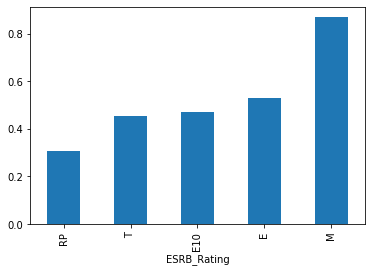

In [286]:
sale_scores.groupby('ESRB_Rating')['Global_Sales'].mean().sort_values().plot(kind='bar')

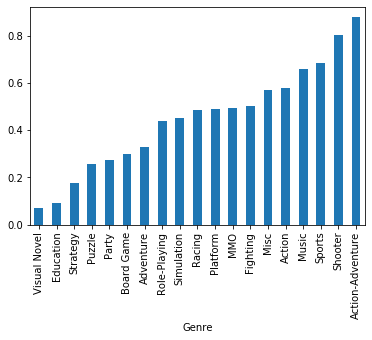

In [287]:
sale_scores.groupby('Genre')['Global_Sales'].mean().sort_values().plot(kind='bar')

In [290]:
len(sale_scores['Publisher'].unique())

322

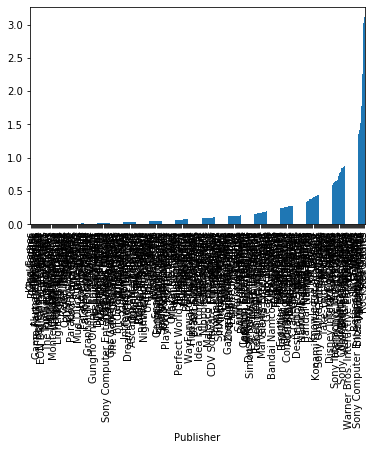

In [288]:
sale_scores.groupby('Publisher')['Global_Sales'].mean().sort_values().plot(kind='bar')

In [294]:
len(sale_scores['Developer'].unique())
sale_scores['Developer'].sort_values().unique()

array(['10tacle Studios AG', '1C Company', '1C Maddox Games', ...,
       'tri-Ace', 'tri-Crescendo / Monolith Soft', 'zSlide'], dtype=object)

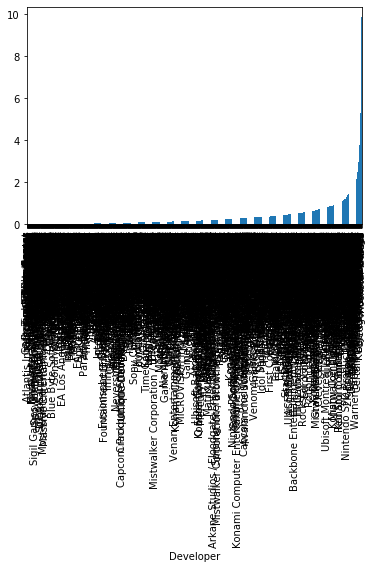

In [289]:
sale_scores.groupby('Developer')['Global_Sales'].mean().sort_values().plot(kind='bar')

C:\Users\Drago\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


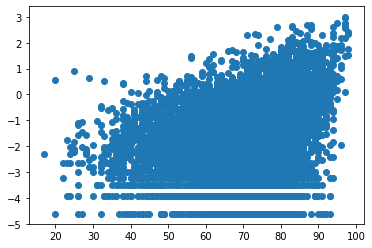

In [273]:
log_sales=np.log(sale_scores['Global_Sales'])
log_mscores=np.log(sale_scores['metascore'])

plt.scatter(x=sale_scores['metascore'],y=log_sales)


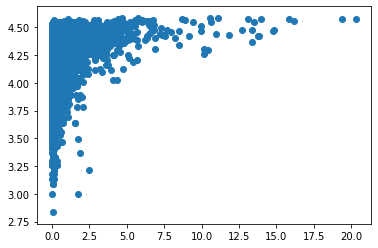

In [276]:

plt.scatter(x=sale_scores['Global_Sales'],y=log_mscores)

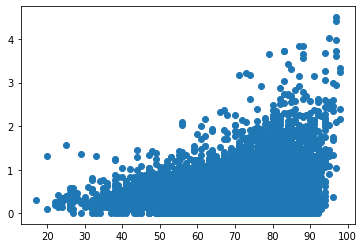

In [281]:
sqrt_sales=np.sqrt(sale_scores['Global_Sales'])
sqrt_mscores=np.sqrt(sale_scores['metascore'])

plt.scatter(x=sale_scores['metascore'],y=sqrt_sales)

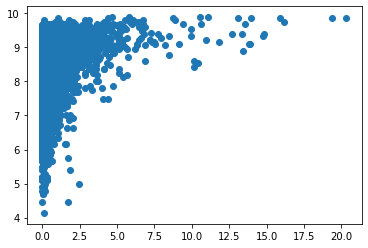

In [278]:
plt.scatter(x=sale_scores['Global_Sales'],y=sqrt_mscores)

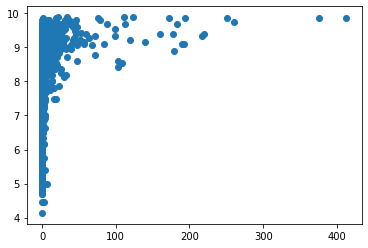

In [282]:
plt.scatter(x=sale_scores['Global_Sales']**2,y=sqrt_mscores)

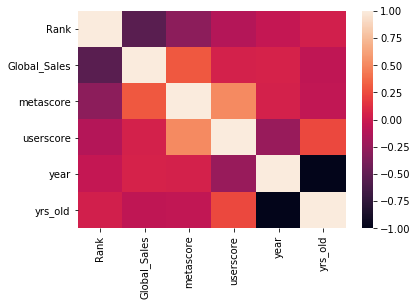

In [283]:
sns.heatmap(sale_scores.corr())

## Adding Features and doing some modeling

In [285]:
sale_scores.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Publisher', 'Developer',
       'Global_Sales', 'console', 'metascore', 'userscore', 'date', 'year',
       'month', 'yrs_old'],
      dtype='object')

In [ ]:
# Drop null values before making dummy columns
sale_scores.dropna(subset=['ESRB_Rating'], inplace=True)

In [284]:
# Make dummy columns for categorical features
def make_dummies(df,col_dummies):
    new_df=df.copy()
    for col in col_dummies:
        dummies=pd.get_dummies(new_df[col], prefix='{}'.format(col),drop_first=True)
        new_df=pd.concat([new_df,dummies], axis=1)
    return new_df

In [295]:
sale_scores=make_dummies(sale_scores,['Genre','ESRB_Rating','console','month'])

In [296]:
sale_scores_pubdev=make_dummies(sale_scores,['Publisher','Developer'])

In [313]:
# Create targets and features
target1=sale_scores['Global_Sales']
target2=sale_scores['metascore']
features1=sale_scores.drop(['Rank','Global_Sales','Name','Genre','ESRB_Rating','Publisher','Developer','date','year',
                            'console','month'],axis=1)
features2=sale_scores.drop(['Rank','metascore','Name','Genre','ESRB_Rating','Publisher','Developer','date','year',
                            'console','month'],axis=1)

In [322]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features1, target1, random_state=22,test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, random_state=22,test_size=0.2)

### Feature selection and modeling without polynomials/interactions

In [315]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,metascore,userscore,yrs_old,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Visual Novel,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,console_DC,console_DS,console_GBA,console_GC,console_N64,console_PC,console_PS,console_PS2,console_PS3,console_PS4,console_PSP,console_Switch,console_VITA,console_WII,console_WIIU,console_X360,console_XBOX,console_XONE,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
metascore,NaN,0.514549,0.049243,0.031879,0.041724,0.015807,0.000629,0.004636,0.023532,0.031232,0.025016,0.033211,0.012417,0.008302,0.011514,0.071087,0.019062,0.003122,0.113675,0.034997,0.003000,0.044488,0.057312,0.014516,0.031198,0.056748,0.095541,0.026867,0.001489,0.005409,0.108983,0.010896,0.029339,0.022653,0.056909,0.033247,0.025110,0.023086,0.100540,0.000248,0.019145,0.017870,0.066301,0.042312,0.032547,0.014223,0.014346,0.033678,0.029183,0.001846,0.027637,0.044814,0.038620,0.068629
userscore,NaN,NaN,0.227120,0.032185,0.019156,0.005691,0.006403,0.018892,0.013848,0.029520,0.003486,0.024840,0.023618,0.005106,0.017191,0.083182,0.033771,0.009362,0.025096,0.039037,0.009913,0.047709,0.003553,0.018445,0.056619,0.040206,0.021311,0.058341,0.046254,0.022701,0.025379,0.023226,0.151045,0.066093,0.093810,0.026082,0.009221,0.044988,0.023740,0.002914,0.080091,0.054466,0.093083,0.017129,0.008883,0.032616,0.011336,0.025403,0.005134,0.005657,0.021639,0.034444,0.017442,0.015914
yrs_old,NaN,NaN,NaN,0.181048,0.013331,0.022893,0.012709,0.004507,0.068032,0.024212,0.090723,0.028808,0.045838,0.007930,0.079287,0.096250,0.016791,0.016566,0.105799,0.046103,0.050006,0.135751,0.125013,0.044487,0.088021,0.066275,0.018391,0.220731,0.216532,0.077076,0.007578,0.178182,0.366550,0.140377,0.469624,0.033783,0.244227,0.153031,0.024651,0.098316,0.102241,0.283654,0.336089,0.030125,0.066013,0.039215,0.018462,0.032952,0.027566,0.034796,0.044138,0.099368,0.013375,0.018351
Genre_Action-Adventure,NaN,NaN,NaN,NaN,0.033581,0.001557,0.001557,0.028915,0.005833,0.032916,0.008548,0.004675,0.031381,0.020750,0.039490,0.041627,0.047915,0.027690,0.051537,0.027785,0.004122,0.041281,0.092952,0.005169,0.040631,0.005399,0.034399,0.027255,0.028496,0.006038,0.019476,0.014275,0.053993,0.022762,0.092426,0.028962,0.013632,0.022084,0.031899,0.115640,0.004553,0.035499,0.129825,0.022315,0.008368,0.006997,0.004504,0.009924,0.000046,0.009896,0.001988,0.006719,0.012028,0.025134
Genre_Adventure,NaN,NaN,NaN,NaN,NaN,0.003206,0.003206,0.059520,0.012006,0.067755,0.017596,0.009622,0.064595,0.042712,0.081286,0.085686,0.098628,0.056997,0.106085,0.057194,0.008485,0.034309,0.039280,0.010640,0.012049,0.003211,0.061575,0.017603,0.012442,0.012428,0.060678,0.002006,0.006654,0.042398,0.001315,0.009169,0.007320,0.015659,0.016612,0.022287,0.035723,0.017657,0.020366,0.027227,0.025727,0.024242,0.003756,0.001471,0.034555,0.005235,0.021636,0.019415,0.014130,0.000153
Genre_Board Game,NaN,NaN,NaN,NaN,NaN,NaN,0.000149,0.002760,0.000557,0.003142,0.000816,0.000446,0.002996,0.001981,0.003770,0.003974,0.004574,0.002643,0.004920,0.002652,0.000393,0.004602,0.005978,0.000493,0.008458,0.000515,0.003284,0.002602,0.002720,0.000576,0.004354,0.001363,0.005154,0.003967,0.003291,0.002765,0.099261,0.001535,0.003045,0.001034,0.004142,0.003787,0.002415,0.003276,0.002564,0.003330,0.002294,0.002498,0.003674,0.004227,0.003110,0.005475,0.027944,0.004489
Genre_Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002760,0.000557,0.003142,0.000816,0.000446,0.002996,0.001981,0.003770,0.003974,0.004574,0.002643,0.004920,0.002652,0.000393,0.004602,0.005978,0.000493,0.008458,0.000515,0.003284,0.002602,0.002720,0.000576,0.004354,0.001363,0.005154,0.003967,0.003291,0.002765,0.001498,0.001535,0.003045,0.001034,0.004142,0.003787,0.002415,0.003276,0.002564,0.044643,0.002294,0.002498,0.003

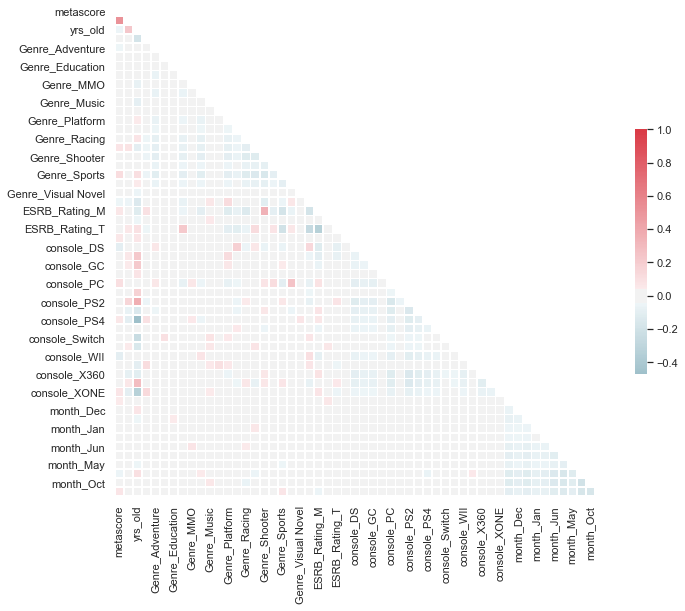

In [316]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [317]:
len(X_train.columns)

54

In [318]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


C:\Users\Drago\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [319]:
len(X_train.columns)

54

In [ ]:
X_train.columns

In [321]:
lm1=LinearRegression()
lm1=lm1.fit(X_train,y_train)

y_pred_train1=lm1.predict(X_train)
y_pred1=lm1.predict(X_test)

train_rmse1=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train1))
test_rmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))

print('Training Error RMSE: '+ str(train_rmse1) )
print('Testing Error RMSE: '+ str(test_rmse1) )

Training Error RMSE: 0.9384698502659702
Testing Error RMSE: 1.1201541592938056


In [379]:
lm1_coef01 = pd.DataFrame(data=lm1.coef_).T
lm1_coef01.columns = X_train.columns
lm1_coef01 = lm1_coef01.T.sort_values(by=0).T
lm1_coef01.T

,0
Genre_Visual Novel,-0.733159
console_DC,-0.615489
console_PC,-0.469478
console_Switch,-0.241008
Genre_Puzzle,-0.237826
console_XBOX,-0.218835
Genre_MMO,-0.204290
console_WIIU,-0.199174
console_VITA,-0.196508
Genre_Strategy,-0.180909


From here we can see that in this base model, all 54 features were used because none of them were highly correlated enough to each other to be dropped. Looking at the coefficients, generally speaking, it would seem that Genre,Console, and Month have the highest effect on Global Sales of video games. Board Game and Visual Novel genres respectively have a strong positive and negative effect on Global Sales, PS3 and DreamCast consoles respectively have a strong positive and negative effect, and Games released in November have a strong positive effect on their Global Sales.

In [353]:
# Select K best features
selector = SelectKBest(f_regression, k=15)

selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x000001F0CADCBCA8>)

In [354]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [355]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 0.95593165690574
Testing Root Mean Squared Error: 1.1357547415694345


In [356]:
selected_columns

Index(['metascore', 'yrs_old', 'Genre_Adventure', 'Genre_Shooter',
       'Genre_Strategy', 'ESRB_Rating_M', 'ESRB_Rating_T', 'console_GC',
       'console_PC', 'console_PS3', 'console_PS4', 'console_X360',
       'console_XBOX', 'month_Nov', 'month_Oct'],
      dtype='object')

In [378]:
lm_kbest_coef01 = pd.DataFrame(data=lm_kbest.coef_).T
lm_kbest_coef01.columns = X_train[selected_columns].columns
lm_kbest_coef01 = lm_kbest_coef01.T.sort_values(by=0).T
lm_kbest_coef01.T

,0
console_PC,-0.531885
console_XBOX,-0.361676
console_GC,-0.329473
Genre_Strategy,-0.147122
Genre_Adventure,-0.140066
ESRB_Rating_T,-0.011867
yrs_old,0.009621
metascore,0.026001
Genre_Shooter,0.145111
month_Oct,0.203753


In [357]:
ols = linear_model.LinearRegression()

In [358]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [359]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [360]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 0.9385336056225119
Testing Root Mean Squared Error: 1.1201305325061748


In [362]:
len(selected_rfe)

46

In [370]:
removed_rfe

Index(['yrs_old', 'Genre_Party', 'ESRB_Rating_E10', 'ESRB_Rating_T',
       'console_GBA', 'console_XONE', 'month_Feb', 'month_Mar'],
      dtype='object')

In [372]:
lm_rfe_coef01 = pd.DataFrame(data=lm_rfe.coef_).T
lm_rfe_coef01.columns = X_train[selected_rfe].columns
lm_rfe_coef01 = lm_rfe_coef01.T.sort_values(by=0).T
lm_rfe_coef01.T

,0
Genre_Visual Novel,-0.733443
console_DC,-0.568321
console_PC,-0.451832
console_Switch,-0.260449
Genre_Puzzle,-0.243130
Genre_MMO,-0.211589
console_WIIU,-0.207247
console_VITA,-0.200596
console_XBOX,-0.184785
Genre_Adventure,-0.179650


The RFECV wrapper method chose to use 46 out of the 54 features and performed slightly better in terms of RMSE than the base model. What's similar is that Genre, Console and Month still seem to be the features with the greatest effect based on coefficient size.

In [374]:
lasso = Lasso(alpha=0.001, normalize=False)

lasso.fit(X_train,y_train)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [375]:
y_train_pred = lasso.predict(X_train)

train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

y_pred = lasso.predict(X_test)

test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_new) )
print('Testing Error: '+ str(test_rmse_new) )

Training Error: 0.9397388883406567
Testing Error: 1.12174191904364


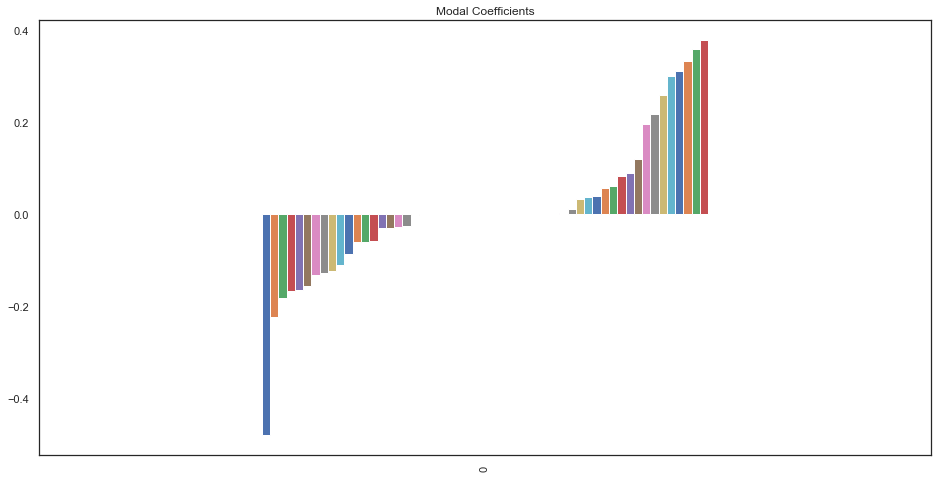

In [376]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [380]:
lasso_coef01.shape

(1, 54)

In [377]:
lasso_coef01.T[lasso_coef01.T[0]!=0]

,0
console_PC,-0.480258
console_XBOX,-0.223018
console_Switch,-0.182397
console_GC,-0.165742
Genre_Puzzle,-0.163464
console_VITA,-0.155453
Genre_Adventure,-0.131783
Genre_Strategy,-0.126666
Genre_Role-Playing,-0.123096
userscore,-0.110983


In [381]:
# Create correlation matrix
corr_matrix2 = X_train2.corr().abs()

# Select upper triangle of correlation matrix
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))
upper2

,Global_Sales,userscore,yrs_old,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Visual Novel,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,console_DC,console_DS,console_GBA,console_GC,console_N64,console_PC,console_PS,console_PS2,console_PS3,console_PS4,console_PSP,console_Switch,console_VITA,console_WII,console_WIIU,console_X360,console_XBOX,console_XONE,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
Global_Sales,NaN,0.050722,0.066678,0.042611,0.057676,0.002747,0.005157,0.007001,0.003656,0.012523,0.007579,0.008551,0.013525,0.039347,0.022421,0.026221,0.090397,0.016745,0.055523,0.072358,0.013779,0.018921,0.142698,0.006554,0.059561,0.011379,0.053775,0.049065,0.058100,0.002196,0.133706,0.009003,0.055559,0.130571,0.070497,0.029954,0.035857,0.036955,0.024706,0.015656,0.102172,0.071209,0.032380,0.005803,0.041206,0.028869,0.020657,0.051268,0.035621,0.037900,0.018151,0.102537,0.063608,0.015185
userscore,NaN,NaN,0.227120,0.032185,0.019156,0.005691,0.006403,0.018892,0.013848,0.029520,0.003486,0.024840,0.023618,0.005106,0.017191,0.083182,0.033771,0.009362,0.025096,0.039037,0.009913,0.047709,0.003553,0.018445,0.056619,0.040206,0.021311,0.058341,0.046254,0.022701,0.025379,0.023226,0.151045,0.066093,0.093810,0.026082,0.009221,0.044988,0.023740,0.002914,0.080091,0.054466,0.093083,0.017129,0.008883,0.032616,0.011336,0.025403,0.005134,0.005657,0.021639,0.034444,0.017442,0.015914
yrs_old,NaN,NaN,NaN,0.181048,0.013331,0.022893,0.012709,0.004507,0.068032,0.024212,0.090723,0.028808,0.045838,0.007930,0.079287,0.096250,0.016791,0.016566,0.105799,0.046103,0.050006,0.135751,0.125013,0.044487,0.088021,0.066275,0.018391,0.220731,0.216532,0.077076,0.007578,0.178182,0.366550,0.140377,0.469624,0.033783,0.244227,0.153031,0.024651,0.098316,0.102241,0.283654,0.336089,0.030125,0.066013,0.039215,0.018462,0.032952,0.027566,0.034796,0.044138,0.099368,0.013375,0.018351
Genre_Action-Adventure,NaN,NaN,NaN,NaN,0.033581,0.001557,0.001557,0.028915,0.005833,0.032916,0.008548,0.004675,0.031381,0.020750,0.039490,0.041627,0.047915,0.027690,0.051537,0.027785,0.004122,0.041281,0.092952,0.005169,0.040631,0.005399,0.034399,0.027255,0.028496,0.006038,0.019476,0.014275,0.053993,0.022762,0.092426,0.028962,0.013632,0.022084,0.031899,0.115640,0.004553,0.035499,0.129825,0.022315,0.008368,0.006997,0.004504,0.009924,0.000046,0.009896,0.001988,0.006719,0.012028,0.025134
Genre_Adventure,NaN,NaN,NaN,NaN,NaN,0.003206,0.003206,0.059520,0.012006,0.067755,0.017596,0.009622,0.064595,0.042712,0.081286,0.085686,0.098628,0.056997,0.106085,0.057194,0.008485,0.034309,0.039280,0.010640,0.012049,0.003211,0.061575,0.017603,0.012442,0.012428,0.060678,0.002006,0.006654,0.042398,0.001315,0.009169,0.007320,0.015659,0.016612,0.022287,0.035723,0.017657,0.020366,0.027227,0.025727,0.024242,0.003756,0.001471,0.034555,0.005235,0.021636,0.019415,0.014130,0.000153
Genre_Board Game,NaN,NaN,NaN,NaN,NaN,NaN,0.000149,0.002760,0.000557,0.003142,0.000816,0.000446,0.002996,0.001981,0.003770,0.003974,0.004574,0.002643,0.004920,0.002652,0.000393,0.004602,0.005978,0.000493,0.008458,0.000515,0.003284,0.002602,0.002720,0.000576,0.004354,0.001363,0.005154,0.003967,0.003291,0.002765,0.099261,0.001535,0.003045,0.001034,0.004142,0.003787,0.002415,0.003276,0.002564,0.003330,0.002294,0.002498,0.003674,0.004227,0.003110,0.005475,0.027944,0.004489
Genre_Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002760,0.000557,0.003142,0.000816,0.000446,0.002996,0.001981,0.003770,0.003974,0.004574,0.002643,0.004920,0.002652,0.000393,0.004602,0.005978,0.000493,0.008458,0.000515,0.003284,0.002602,0.002720,0.000576,0.004354,0.001363,0.005154,0.003967,0.003291,0.002765,0.001498,0.001535,0.003045,0.001034,0.004142,0.003787,0.002415,0.003276,0.002564,0.044643,0.002294,0.002498

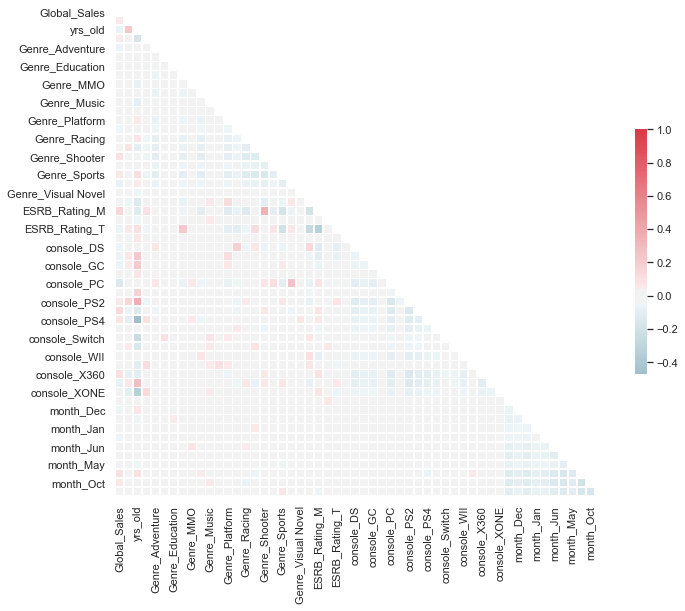

In [382]:

sns.set(style="white")


# Compute the correlation matrix
corr2 = X_train2.corr()

# Generate a mask for the upper triangle
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure
f2, ax2 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap2 = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask2, cmap=cmap2, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [383]:
len(X_train2.columns)

54

In [384]:
# Find index of feature columns with correlation greater than 0.90
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.90)]
X_train2.drop(columns=to_drop2, inplace=True)
X_test2.drop(columns=to_drop2, inplace=True)


C:\Users\Drago\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [385]:
len(X_train2.columns)

54

In [386]:
X_train2.columns

Index(['Global_Sales', 'userscore', 'yrs_old', 'Genre_Action-Adventure',
       'Genre_Adventure', 'Genre_Board Game', 'Genre_Education',
       'Genre_Fighting', 'Genre_MMO', 'Genre_Misc', 'Genre_Music',
       'Genre_Party', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Genre_Visual Novel',
       'ESRB_Rating_E10', 'ESRB_Rating_M', 'ESRB_Rating_RP', 'ESRB_Rating_T',
       'console_DC', 'console_DS', 'console_GBA', 'console_GC', 'console_N64',
       'console_PC', 'console_PS', 'console_PS2', 'console_PS3', 'console_PS4',
       'console_PSP', 'console_Switch', 'console_VITA', 'console_WII',
       'console_WIIU', 'console_X360', 'console_XBOX', 'console_XONE',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep'],
      dtype='object')

In [387]:
lm2=LinearRegression()
lm2=lm2.fit(X_train2,y_train2)

y_pred_train2=lm2.predict(X_train2)
y_pred2=lm2.predict(X_test2)

train_rmse2=np.sqrt(metrics.mean_squared_error(y_train2,y_pred_train2))
test_rmse2=np.sqrt(metrics.mean_squared_error(y_test2,y_pred2))

print('Training Error RMSE: '+ str(train_rmse2) )
print('Testing Error RMSE: '+ str(test_rmse2) )

Training Error RMSE: 9.49291189234741
Testing Error RMSE: 10.0325138916853


In [388]:
lm2_coef01 = pd.DataFrame(data=lm2.coef_).T
lm2_coef01.columns = X_train2.columns
lm2_coef01 = lm2_coef01.T.sort_values(by=0).T
lm2_coef01.T

,0
Genre_Board Game,-13.103888
console_WII,-3.925366
Genre_Party,-2.925833
console_DS,-1.950897
console_PS2,-1.898740
console_PSP,-1.132728
ESRB_Rating_RP,-0.599524
yrs_old,-0.263139
console_PS,-0.257766
month_Jan,-0.206877


In [389]:
# Select K best features
selector2 = SelectKBest(f_regression, k=15)

selector2.fit(X_train2, y_train2)

SelectKBest(k=15, score_func=<function f_regression at 0x000001F0CADCBCA8>)

In [390]:
selected_columns2 = X_train2.columns[selector2.get_support()]
removed_columns2 = X_train2.columns[~selector2.get_support()]

In [391]:
#instantiate a linear regression object
lm_kbest2 = LinearRegression()

#fit the linear regression to the data
lm_kbest2 = lm_kbest2.fit(X_train2[selected_columns2], y_train2)

y_train_kbest2 = lm_kbest2.predict(X_train2[selected_columns2])


trainK_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_kbest2))


print('Training Root Mean Squared Error:' , trainK_rmse2)

y_kbest2 = lm_kbest2.predict(X_test2[selected_columns2])

testK_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_kbest2))

print('Testing Root Mean Squared Error:' , testK_rmse2)


Training Root Mean Squared Error: 9.694976924729756
Testing Root Mean Squared Error: 10.11633465562207


In [392]:
selected_columns2

Index(['Global_Sales', 'userscore', 'yrs_old', 'Genre_Role-Playing',
       'Genre_Sports', 'ESRB_Rating_E10', 'ESRB_Rating_M', 'console_DC',
       'console_DS', 'console_PC', 'console_PS4', 'console_WII',
       'console_XONE', 'month_Nov', 'month_Sep'],
      dtype='object')

In [393]:
lm_kbest2_coef01 = pd.DataFrame(data=lm_kbest2.coef_).T
lm_kbest2_coef01.columns = X_train2[selected_columns2].columns
lm_kbest2_coef01 = lm_kbest2_coef01.T.sort_values(by=0).T
lm_kbest2_coef01.T

,0
console_WII,-4.310557
console_DS,-2.054001
month_Nov,-0.740150
yrs_old,-0.329664
ESRB_Rating_M,-0.099116
ESRB_Rating_E10,0.046807
Genre_Role-Playing,1.551576
month_Sep,1.614297
console_PS4,2.303588
Global_Sales,3.380823


In [409]:
ols2 = linear_model.LinearRegression()

In [410]:
# Create recursive feature eliminator that scores features by mean squared errors
selector2 = RFECV(estimator=ols2, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector2.fit(X_train2, y_train2)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [411]:
selected_rfe2 = X_train2.columns[selector2.support_]
removed_rfe2 = X_train2.columns[~selector2.support_]


In [412]:
#instantiate a linear regression object
lm_rfe2 = LinearRegression()

#fit the linear regression to the data
lm_rfe2 = lm_rfe2.fit(X_train2[selected_rfe2], y_train2)

y_rfe2 = lm_rfe2.predict(X_train2[selected_rfe2])


trainRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_rfe2))


print('Training Root Mean Squared Error:' , trainRFE_rmse2)

y_pred_rfe2 = lm_rfe2.predict(X_test2[selected_rfe2])

testRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_rfe2))

print('Testing Root Mean Squared Error:' , testRFE_rmse2)


Training Root Mean Squared Error: 9.492931292339149
Testing Root Mean Squared Error: 10.032268144173955


In [413]:
len(selected_rfe2)

51

In [414]:
removed_rfe2

Index(['ESRB_Rating_T', 'console_GBA', 'month_May'], dtype='object')

In [415]:
lm_rfe2_coef01 = pd.DataFrame(data=lm_rfe2.coef_).T
lm_rfe2_coef01.columns = X_train2[selected_rfe2].columns
lm_rfe2_coef01 = lm_rfe2_coef01.T.sort_values(by=0).T
lm_rfe2_coef01.T

,0
Genre_Board Game,-13.072178
console_WII,-3.984240
Genre_Party,-2.926782
console_DS,-2.003938
console_PS2,-1.971163
console_PSP,-1.198254
ESRB_Rating_RP,-0.561757
console_PS,-0.328472
yrs_old,-0.261260
month_Nov,-0.199514


In [401]:
lasso2 = Lasso(alpha=0.001, normalize=False)

lasso2.fit(X_train2,y_train2)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [402]:
y_train_pred2 = lasso2.predict(X_train2)

train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

y_pred2 = lasso2.predict(X_test2)

test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
print('Training Error: '+ str(train_rmse_new2) )
print('Testing Error: '+ str(test_rmse_new2) )

Training Error: 9.493645714039582
Testing Error: 10.031097183113076


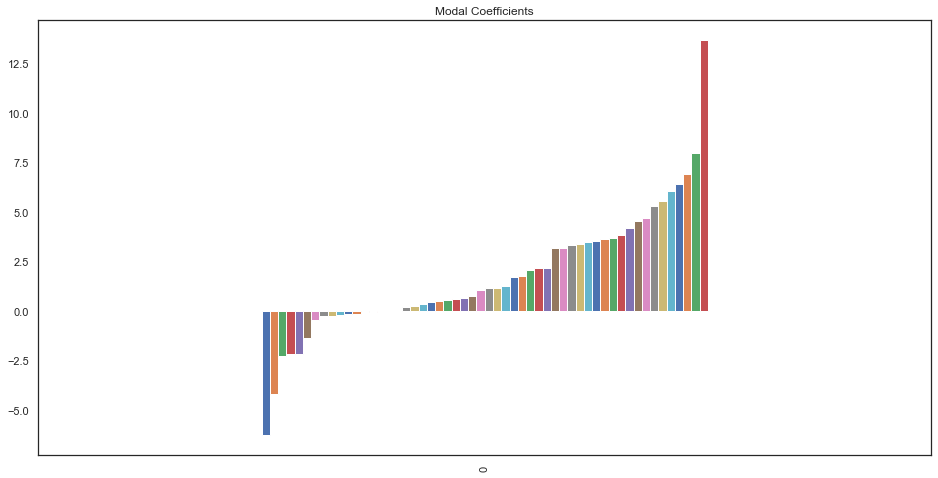

In [403]:
lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
lasso2_coef01.columns = X_train2.columns
lasso2_coef01 = lasso2_coef01.T.sort_values(by=0).T
lasso2_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [404]:
lasso2_coef01.shape

(1, 54)

In [406]:
lasso2_coef01.T[lasso2_coef01.T[0]!=0]

,0
Genre_Board Game,-6.299202
console_WII,-4.184808
Genre_Party,-2.280552
console_DS,-2.203962
console_PS2,-2.174615
console_PSP,-1.391612
console_PS,-0.458007
yrs_old,-0.263409
month_Nov,-0.259184
month_Jan,-0.234475


In [407]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled =pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_scaled =pd.DataFrame(data=scaler.transform(X_test), columns=X_train.columns)
# X_test_scaled=scaler.transform(X_test)

In [408]:
scaler2= StandardScaler()
scaler2.fit(X_train2)
X_train_scaled2 =pd.DataFrame(data=scaler2.transform(X_train2), columns=X_train2.columns)
X_test_scaled2 =pd.DataFrame(data=scaler2.transform(X_test2), columns=X_train2.columns)
# X_test_scaled=scaler.transform(X_test)

In [416]:
ols_scaler = linear_model.LinearRegression()

In [417]:
# Create recursive feature eliminator that scores features by mean squared errors
selector_scaler = RFECV(estimator=ols_scaler, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector_scaler.fit(X_train_scaled, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [418]:
selected_rfe_scaler = X_train_scaled.columns[selector_scaler.support_]
removed_rfe_scaler = X_train.columns[~selector_scaler.support_]


In [419]:
#instantiate a linear regression object
lm_rfe_scaler = LinearRegression()

#fit the linear regression to the data
lm_rfe_scaler = lm_rfe_scaler.fit(X_train_scaled[selected_rfe_scaler], y_train)

y_rfe_scaler = lm_rfe_scaler.predict(X_train_scaled[selected_rfe_scaler])


trainRFE_rmse_scaler = np.sqrt(metrics.mean_squared_error(y_train, y_rfe_scaler))


print('Training Root Mean Squared Error Sales:' , trainRFE_rmse_scaler)

y_pred_rfe_scaler = lm_rfe_scaler.predict(X_test_scaled[selected_rfe_scaler])

testRFE_rmse_scaler = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe_scaler))

print('Testing Root Mean Squared Error Sales:' , testRFE_rmse_scaler)


Training Root Mean Squared Error Sales: 0.9398966769199978
Testing Root Mean Squared Error Sales: 1.1214149966748928


In [420]:
ols_scaler2 = linear_model.LinearRegression()

In [421]:
# Create recursive feature eliminator that scores features by mean squared errors
selector_scaler2 = RFECV(estimator=ols_scaler2, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector_scaler2.fit(X_train_scaled2, y_train2)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [422]:
selected_rfe_scaler2 = X_train_scaled2.columns[selector_scaler2.support_]
removed_rfe_scaler2 = X_train_scaled2.columns[~selector_scaler2.support_]


In [423]:
#instantiate a linear regression object
lm_rfe_scaler2 = LinearRegression()

#fit the linear regression to the data
lm_rfe_scaler2 = lm_rfe_scaler2.fit(X_train_scaled2[selected_rfe_scaler2], y_train2)

y_rfe_scaler2 = lm_rfe_scaler2.predict(X_train_scaled2[selected_rfe_scaler2])


trainRFE_rmse_scaler2 = np.sqrt(metrics.mean_squared_error(y_train2, y_rfe_scaler2))


print('Training Root Mean Squared Error Rating:' , trainRFE_rmse_scaler2)

y_pred_rfe_scaler2 = lm_rfe_scaler2.predict(X_test_scaled2[selected_rfe_scaler2])

testRFE_rmse_scaler2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_rfe_scaler2))

print('Testing Root Mean Squared Error Rating:' , testRFE_rmse_scaler2)


Training Root Mean Squared Error Rating: 9.535632691424643
Testing Root Mean Squared Error Rating: 10.076828424740725


### Feature selection and Modeling with polynomials/interactions

In [525]:
poly= PolynomialFeatures(degree=2, include_bias=False) # if you only want interactions without any squared features add interaction_only=True

poly_train=poly.fit_transform(X_train)
poly_test= poly.transform(X_test) # Not sure if this should be fit_transform or just transform

poly_cols=poly.get_feature_names(X_train.columns)
poly_cols=[col.replace(' ','X') for col in poly_cols]

X_train_poly=pd.DataFrame(data=poly_train,columns=poly_cols)
X_test_poly=pd.DataFrame(data=poly_test,columns=poly_cols)

In [591]:
poly2= PolynomialFeatures(degree=2, include_bias=False) # if you only want interactions without any squared features add interaction_only=True

poly_train2=poly2.fit_transform(X_train2)
poly_test2= poly2.transform(X_test2) # Not sure if this should be fit_transform or just transform

poly_cols2=poly2.get_feature_names(X_train2.columns)
poly_cols2=[col.replace(' ','X') for col in poly_cols2]

X_train_poly2=pd.DataFrame(data=poly_train2,columns=poly_cols2)
X_test_poly2=pd.DataFrame(data=poly_test2,columns=poly_cols2)

In [426]:
# Create correlation matrix
corr_matrix = X_train_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,metascore,userscore,yrs_old,Genre_Action-Adventure,Genre_Adventure,Genre_BoardXGame,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_VisualXNovel,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,console_DC,console_DS,console_GBA,console_GC,console_N64,console_PC,console_PS,console_PS2,console_PS3,console_PS4,console_PSP,console_Switch,console_VITA,console_WII,console_WIIU,console_X360,console_XBOX,console_XONE,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,metascore^2,metascoreXuserscore,metascoreXyrs_old,metascoreXGenre_Action-Adventure,metascoreXGenre_Adventure,metascoreXGenre_BoardXGame,metascoreXGenre_Education,metascoreXGenre_Fighting,metascoreXGenre_MMO,metascoreXGenre_Misc,metascoreXGenre_Music,metascoreXGenre_Party,metascoreXGenre_Platform,metascoreXGenre_Puzzle,metascoreXGenre_Racing,metascoreXGenre_Role-Playing,metascoreXGenre_Shooter,metascoreXGenre_Simulation,metascoreXGenre_Sports,metascoreXGenre_Strategy,metascoreXGenre_VisualXNovel,metascoreXESRB_Rating_E10,metascoreXESRB_Rating_M,metascoreXESRB_Rating_RP,metascoreXESRB_Rating_T,metascoreXconsole_DC,metascoreXconsole_DS,metascoreXconsole_GBA,metascoreXconsole_GC,metascoreXconsole_N64,metascoreXconsole_PC,metascoreXconsole_PS,metascoreXconsole_PS2,metascoreXconsole_PS3,metascoreXconsole_PS4,metascoreXconsole_PSP,metascoreXconsole_Switch,metascoreXconsole_VITA,metascoreXconsole_WII,metascoreXconsole_WIIU,metascoreXconsole_X360,metascoreXconsole_XBOX,metascoreXconsole_XONE,metascoreXmonth_Aug,metascoreXmonth_Dec,metascoreXmonth_Feb,metascoreXmonth_Jan,metascoreXmonth_Jul,metascoreXmonth_Jun,metascoreXmonth_Mar,metascoreXmonth_May,metascoreXmonth_Nov,metascoreXmonth_Oct,metascoreXmonth_Sep,userscore^2,userscoreXyrs_old,userscoreXGenre_Action-Adventure,userscoreXGenre_Adventure,userscoreXGenre_BoardXGame,userscoreXGenre_Education,userscoreXGenre_Fighting,userscoreXGenre_MMO,userscoreXGenre_Misc,userscoreXGenre_Music,userscoreXGenre_Party,userscoreXGenre_Platform,userscoreXGenre_Puzzle,userscoreXGenre_Racing,userscoreXGenre_Role-Playing,userscoreXGenre_Shooter,userscoreXGenre_Simulation,userscoreXGenre_Sports,userscoreXGenre_Strategy,userscoreXGenre_VisualXNovel,userscoreXESRB_Rating_E10,userscoreXESRB_Rating_M,userscoreXESRB_Rating_RP,userscoreXESRB_Rating_T,userscoreXconsole_DC,userscoreXconsole_DS,userscoreXconsole_GBA,userscoreXconsole_GC,userscoreXconsole_N64,userscoreXconsole_PC,userscoreXconsole_PS,userscoreXconsole_PS2,userscoreXconsole_PS3,userscoreXconsole_PS4,userscoreXconsole_PSP,userscoreXconsole_Switch,userscoreXconsole_VITA,userscoreXconsole_WII,userscoreXconsole_WIIU,userscoreXconsole_X360,userscoreXconsole_XBOX,userscoreXconsole_XONE,...,console_VITAXconsole_X360,console_VITAXconsole_XBOX,console_VITAXconsole_XONE,console_VITAXmonth_Aug,console_VITAXmonth_Dec,console_VITAXmonth_Feb,console_VITAXmonth_Jan,console_VITAXmonth_Jul,console_VITAXmonth_Jun,console_VITAXmonth_Mar,console_VITAXmonth_May,console_VITAXmonth_Nov,console_VITAXmonth_Oct,console_VITAXmonth_Sep,console_WII^2,console_WIIXconsole_WIIU,console_WIIXconsole_X360,console_WIIXconsole_XBOX,console_WIIXconsole_XONE,console_WIIXmonth_Aug,console_WIIXmonth_Dec,console_WIIXmonth_Feb,console_WIIXmonth_Jan,console_WIIXmonth_Jul,console_WIIXmonth_Jun,console_WIIXmonth_Mar,console_WIIXmonth_May,console_WIIXmonth_Nov,console_WIIXmonth_Oct,console_WIIXmonth_Sep,console_WIIU^2,console_WIIUXconsole_X360,console_WIIUXconsole_XBOX,console_WIIUXconsole_XONE,console_WIIUXmonth_Aug,console_WIIUXmonth_Dec,console_WIIUXmonth_Feb,console_WIIUXmonth_Jan,console_WIIUXmonth_Jul,console_WIIUXmonth_Jun,console_WIIUXmonth_Mar,console_WIIUXmonth_May,console_WIIUXmonth_Nov,console_WIIUXmonth_Oct,console_WIIUXmonth_Sep,console_X360^2,console_X360Xconsole_XBOX,console_X360Xconsole_XONE,console_X360X

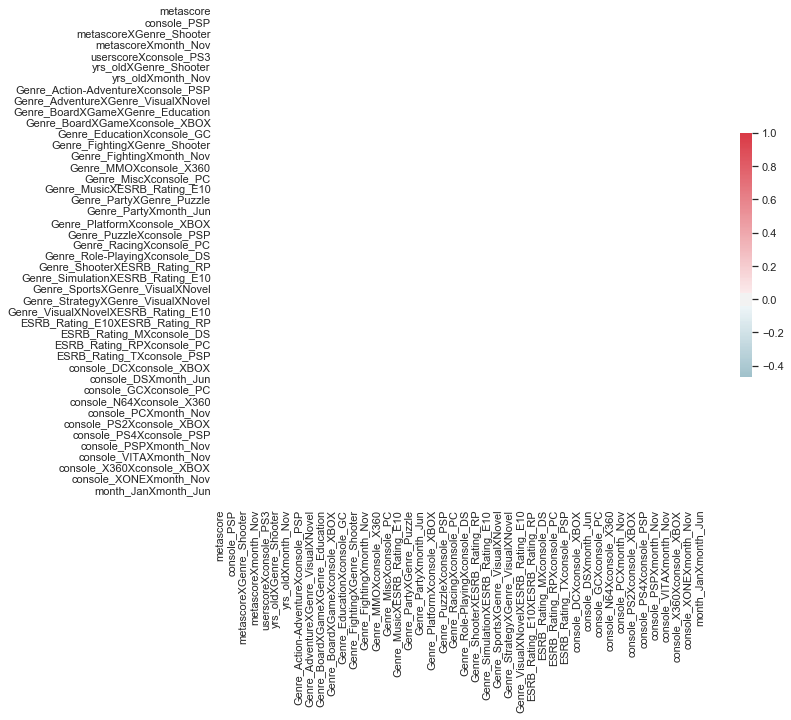

In [427]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [428]:
len(X_train_poly.columns)

1539

In [429]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
X_train_poly.drop(columns=to_drop, inplace=True)
X_test_poly.drop(columns=to_drop, inplace=True)


In [430]:
len(X_train_poly.columns)

1340

In [ ]:
X_train_poly.columns

In [431]:
lm1=LinearRegression()
lm1=lm1.fit(X_train_poly,y_train)

y_pred_train1=lm1.predict(X_train_poly)
y_pred1=lm1.predict(X_test_poly)

train_rmse1=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train1))
test_rmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))

print('Training Error RMSE: '+ str(train_rmse1) )
print('Testing Error RMSE: '+ str(test_rmse1) )

Training Error RMSE: 0.8530842862780436
Testing Error RMSE: 284619449.65085703


In [379]:
lm1_coef01 = pd.DataFrame(data=lm1.coef_).T
lm1_coef01.columns = X_train_poly.columns
lm1_coef01 = lm1_coef01.T.sort_values(by=0).T
lm1_coef01.T

,0
Genre_Visual Novel,-0.733159
console_DC,-0.615489
console_PC,-0.469478
console_Switch,-0.241008
Genre_Puzzle,-0.237826
console_XBOX,-0.218835
Genre_MMO,-0.204290
console_WIIU,-0.199174
console_VITA,-0.196508
Genre_Strategy,-0.180909


From here we can see that in this base model, all 54 features were used because none of them were highly correlated enough to each other to be dropped. Looking at the coefficients, generally speaking, it would seem that Genre,Console, and Month have the highest effect on Global Sales of video games. Board Game and Visual Novel genres respectively have a strong positive and negative effect on Global Sales, PS3 and DreamCast consoles respectively have a strong positive and negative effect, and Games released in November have a strong positive effect on their Global Sales.

In [514]:
# Select K best features
selector = SelectKBest(f_regression, k=89)

selector.fit(X_train_poly, y_train)

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=89, score_func=<function f_regression at 0x000001F0CADCBCA8>)

In [515]:
selected_columns = X_train_poly.columns[selector.get_support()]
removed_columns = X_train_poly.columns[~selector.get_support()]

In [516]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train_poly[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train_poly[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test_poly[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 0.8295549761618517
Testing Root Mean Squared Error: 1.0080475036685799


In [517]:
len(selected_columns)

89

In [518]:
lm_kbest_coef01 = pd.DataFrame(data=lm_kbest.coef_).T
lm_kbest_coef01.columns = X_train_poly[selected_columns].columns
lm_kbest_coef01 = lm_kbest_coef01.T.sort_values(by=0).T
lm_kbest_coef01

,console_PS4^2,console_PS4,ESRB_Rating_M,ESRB_Rating_M^2,month_Nov,month_Nov^2,console_X360^2,console_X360,console_PS3^2,console_PS3,month_Oct,month_Oct^2,ESRB_Rating_MXconsole_PC,userscoreXconsole_PS4,console_XBOX^2,console_XBOX,userscoreXGenre_Shooter,userscoreXESRB_Rating_M,userscoreXconsole_PS3,metascore,userscoreXconsole_X360,Genre_Role-PlayingXESRB_Rating_M,userscoreXmonth_Nov,userscoreXconsole_PS2,yrs_oldXconsole_X360,metascoreXconsole_PC,yrs_oldXconsole_PS3,yrs_oldXconsole_PC,yrs_oldXGenre_Strategy,metascoreXconsole_XBOX,yrs_oldXconsole_PS2,metascoreXGenre_Strategy,ESRB_Rating_T^2,ESRB_Rating_T,metascoreXuserscore,yrs_old^2,metascoreXGenre_Sports,metascore^2,userscoreXGenre_Strategy,metascoreXmonth_Oct,yrs_oldXESRB_Rating_M,metascoreXGenre_Shooter,metascoreXconsole_PS2,metascoreXmonth_Nov,yrs_oldXconsole_XBOX,Genre_Action-AdventureXESRB_Rating_M,yrs_oldXconsole_PS4,metascoreXconsole_PS3,userscoreXmonth_Oct,metascoreXconsole_X360,metascoreXESRB_Rating_M,userscore^2,yrs_oldXconsole_XONE,ESRB_Rating_TXconsole_PC,metascoreXconsole_PS4,yrs_old,console_PS3Xmonth_Oct,Genre_ShooterXconsole_X360,Genre_Shooter^2,Genre_Shooter,userscoreXconsole_XBOX,console_X360Xmonth_Oct,ESRB_Rating_MXconsole_XONE,Genre_ShooterXESRB_Rating_M,userscoreXconsole_PC,Genre_SportsXconsole_PS2,ESRB_Rating_MXmonth_Oct,Genre_ShooterXconsole_PS3,Genre_Strategy,Genre_Strategy^2,Genre_StrategyXconsole_PC,console_PS4Xmonth_Oct,console_X360Xmonth_Nov,Genre_ShooterXconsole_PS4,console_XONEXmonth_Nov,console_PS4Xmonth_Sep,ESRB_Rating_MXconsole_PS3,console_PS3Xmonth_Nov,console_PC^2,console_PC,ESRB_Rating_MXmonth_Nov,Genre_ShooterXmonth_Nov,Genre_SportsXmonth_Aug,console_PS4Xmonth_Nov,ESRB_Rating_MXconsole_X360,Genre_ShooterXconsole_XONE,ESRB_Rating_MXconsole_PS4,Genre_SportsXconsole_PS4,Genre_Action-AdventureXmonth_Oct
0,-0.75751,-0.75751,-0.677883,-0.677883,-0.449885,-0.449885,-0.418137,-0.418137,-0.393405,-0.393405,-0.380615,-0.380615,-0.221096,-0.219398,-0.17253,-0.17253,-0.144776,-0.126832,-0.107978,-0.107031,-0.089021,-0.061933,-0.059296,-0.048682,-0.042461,-0.028086,-0.023532,-0.015804,-0.013533,-0.011647,-0.009619,-0.007599,-0.006695,-0.006695,-0.006375,-0.002848,-0.001386,0.00122,0.003411,0.009862,0.01023,0.01054,0.011362,0.02028,0.023662,0.024656,0.025743,0.026689,0.027724,0.027868,0.029291,0.03273,0.034989,0.038331,0.041166,0.057843,0.059885,0.070317,0.079987,0.079987,0.088845,0.090289,0.12075,0.129626,0.135593,0.136631,0.189427,0.198391,0.207393,0.207393,0.212501,0.265696,0.286592,0.340279,0.364335,0.366133,0.423386,0.440729,0.443755,0.443755,0.458845,0.468254,0.473482,0.532208,0.552383,0.605433,0.675268,0.764075,0.915434


In [450]:
ols = linear_model.LinearRegression()

In [451]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train_poly, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [452]:
selected_rfe = X_train_poly.columns[selector.support_]
removed_rfe = X_train_poly.columns[~selector.support_]


In [453]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train_poly[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train_poly[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test_poly[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 1.0624491396917919
Testing Root Mean Squared Error: 1.2455360301187102


In [454]:
len(selected_rfe)

2

In [455]:
#removed_rfe
selected_rfe

Index(['Genre_MMOXESRB_Rating_M', 'Genre_MMOXESRB_Rating_T'], dtype='object')

In [456]:
lm_rfe_coef01 = pd.DataFrame(data=lm_rfe.coef_).T
lm_rfe_coef01.columns = X_train_poly[selected_rfe].columns
lm_rfe_coef01 = lm_rfe_coef01.T.sort_values(by=0).T
lm_rfe_coef01.T

,0
Genre_MMOXESRB_Rating_T,-0.146671
Genre_MMOXESRB_Rating_M,-0.023814


In [526]:
lasso = Lasso(alpha=0.001, normalize=False, max_iter=10000)

lasso.fit(X_train_poly,y_train)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [527]:
y_train_pred = lasso.predict(X_train_poly)

train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

y_pred = lasso.predict(X_test_poly)

test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_new) )
print('Testing Error: '+ str(test_rmse_new) )

Training Error: 0.7986423408286653
Testing Error: 0.9831776615463915


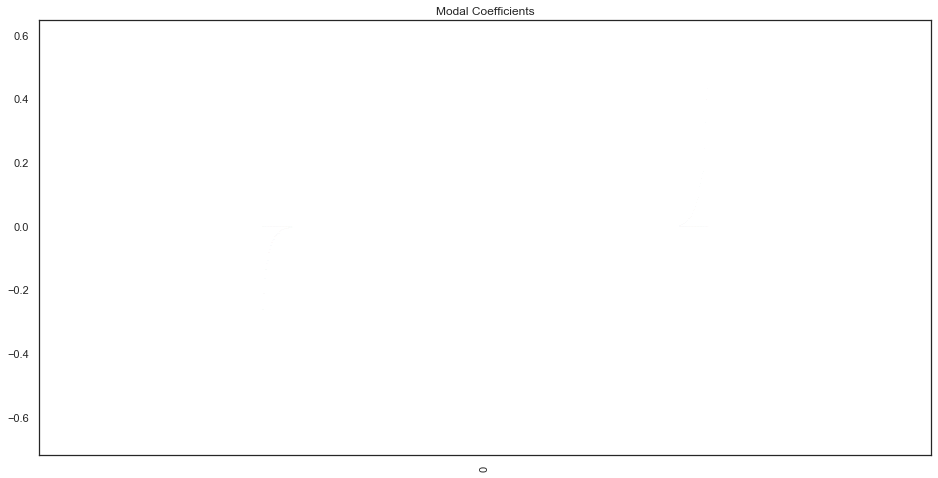

In [528]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_poly.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [529]:
lasso_coef01.shape

(1, 1539)

In [530]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
len(X_lasso)

223

In [531]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
i=0
while len(X_lasso)>100 or i<3:
    #Make alpha less strict to decrease number of features
    lasso = Lasso(alpha=0.01, normalize=False, max_iter=10000)

    lasso.fit(X_train_poly[X_lasso],y_train)
    y_train_pred = lasso.predict(X_train_poly[X_lasso])

    train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    y_pred = lasso.predict(X_test_poly[X_lasso])

    test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training Error: '+ str(train_rmse_new) )
    print('Testing Error: '+ str(test_rmse_new) )
    lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
    lasso_coef01.columns = X_train_poly[X_lasso].columns
    X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X_lasso))+'\n')

Training Error: 0.8446943048671078
Testing Error: 1.023169635750995
# of Features Used: 88

Training Error: 0.8446943044203727
Testing Error: 1.0231696339712981
# of Features Used: 88

Training Error: 0.8446943044203727
Testing Error: 1.0231696339712981
# of Features Used: 88



In [532]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
i=0
while len(X_lasso)>100 or i<3:
    #Make alpha stricter again to get a better fit
    lasso = Lasso(alpha=0.001, normalize=False, max_iter=10000)

    lasso.fit(X_train_poly[X_lasso],y_train)
    y_train_pred = lasso.predict(X_train_poly[X_lasso])

    train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    y_pred = lasso.predict(X_test_poly[X_lasso])

    test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training Error: '+ str(train_rmse_new) )
    print('Testing Error: '+ str(test_rmse_new) )
    lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
    lasso_coef01.columns = X_train_poly[X_lasso].columns
    X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X_lasso))+'\n')

Training Error: 0.8345756651855117
Testing Error: 1.016350137660853
# of Features Used: 87

Training Error: 0.8345756651724971
Testing Error: 1.0163501391411944
# of Features Used: 87

Training Error: 0.8345756651724971
Testing Error: 1.0163501391411944
# of Features Used: 87



In [492]:
lasso_coef01.T.sort_values(by=0)[lasso_coef01.T[0]!=0]

C:\Users\Drago\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0
metascore,-0.099882
yrs_oldXmonth_Nov,-0.043868
yrs_oldXESRB_Rating_M,-0.037987
yrs_oldXGenre_Shooter,-0.034219
metascoreXconsole_DC,-0.011451
metascoreXconsole_PC,-0.008605
metascoreXuserscore,-0.006910
metascoreXconsole_XBOX,-0.004722
metascoreXconsole_GC,-0.004602
metascoreXconsole_WIIU,-0.004133


In [540]:
lasso = Lasso(alpha=0.001, normalize=False, max_iter=10000)

lasso.fit(X_train_poly,y_train)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [541]:
y_train_pred = lasso.predict(X_train_poly)

train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

y_pred = lasso.predict(X_test_poly)

test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_new) )
print('Testing Error: '+ str(test_rmse_new) )

Training Error: 0.7986423408286653
Testing Error: 0.9831776615463915


In [542]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_poly.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
#lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [543]:
lasso_coef01.shape

(1, 1539)

In [544]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
len(X_lasso)

223

In [545]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
i=0
while len(X_lasso)>100 or i<1:
    #Make alpha less strict to decrease number of features
    lasso = Lasso(alpha=0.01, normalize=False, max_iter=10000)

    lasso.fit(X_train_poly[X_lasso],y_train)
    y_train_pred = lasso.predict(X_train_poly[X_lasso])

    train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    y_pred = lasso.predict(X_test_poly[X_lasso])

    test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training Error: '+ str(train_rmse_new) )
    print('Testing Error: '+ str(test_rmse_new) )
    lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
    lasso_coef01.columns = X_train_poly[X_lasso].columns
    X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X_lasso))+'\n')

Training Error: 0.8446943048671078
Testing Error: 1.023169635750995
# of Features Used: 88



In [546]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
i=0
while len(X_lasso)>100 or i<1:
    #Make alpha stricter again to get a better fit
    lasso = Lasso(alpha=0.1, normalize=False, max_iter=10000)

    lasso.fit(X_train_poly[X_lasso],y_train)
    y_train_pred = lasso.predict(X_train_poly[X_lasso])

    train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    y_pred = lasso.predict(X_test_poly[X_lasso])

    test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training Error: '+ str(train_rmse_new) )
    print('Testing Error: '+ str(test_rmse_new) )
    lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
    lasso_coef01.columns = X_train_poly[X_lasso].columns
    X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X_lasso))+'\n')

Training Error: 0.8829406443164979
Testing Error: 1.0598403440047388
# of Features Used: 42



In [549]:
X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
i=0
while len(X_lasso)>100 or i<1:
    #Make alpha stricter again to get a better fit
    lasso = Lasso(alpha=0.0001, normalize=False, max_iter=10000)

    lasso.fit(X_train_poly[X_lasso],y_train)
    y_train_pred = lasso.predict(X_train_poly[X_lasso])

    train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    y_pred = lasso.predict(X_test_poly[X_lasso])

    test_rmse_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training Error: '+ str(train_rmse_new) )
    print('Testing Error: '+ str(test_rmse_new) )
    lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
    lasso_coef01.columns = X_train_poly[X_lasso].columns
    X_lasso=lasso_coef01.T[lasso_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X_lasso))+'\n')

Training Error: 0.8723855310686907
Testing Error: 1.047534992652819
# of Features Used: 42



In [550]:
lasso_coef01.T.sort_values(by=0)[lasso_coef01.T[0]!=0]

C:\Users\Drago\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0
metascore,-0.100246
yrs_oldXmonth_Nov,-0.043887
yrs_oldXESRB_Rating_M,-0.038297
yrs_oldXGenre_Shooter,-0.034434
metascoreXconsole_DC,-0.011535
metascoreXconsole_PC,-0.008603
metascoreXuserscore,-0.006925
metascoreXconsole_XBOX,-0.004709
metascoreXconsole_GC,-0.004613
metascoreXconsole_WIIU,-0.004266


In [551]:
# Create correlation matrix
corr_matrix2 = X_train_poly2.corr().abs()

# Select upper triangle of correlation matrix
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))
upper2

,Global_Sales,userscore,yrs_old,Genre_Action-Adventure,Genre_Adventure,Genre_BoardXGame,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_VisualXNovel,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,console_DC,console_DS,console_GBA,console_GC,console_N64,console_PC,console_PS,console_PS2,console_PS3,console_PS4,console_PSP,console_Switch,console_VITA,console_WII,console_WIIU,console_X360,console_XBOX,console_XONE,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Global_Sales^2,Global_SalesXuserscore,Global_SalesXyrs_old,Global_SalesXGenre_Action-Adventure,Global_SalesXGenre_Adventure,Global_SalesXGenre_BoardXGame,Global_SalesXGenre_Education,Global_SalesXGenre_Fighting,Global_SalesXGenre_MMO,Global_SalesXGenre_Misc,Global_SalesXGenre_Music,Global_SalesXGenre_Party,Global_SalesXGenre_Platform,Global_SalesXGenre_Puzzle,Global_SalesXGenre_Racing,Global_SalesXGenre_Role-Playing,Global_SalesXGenre_Shooter,Global_SalesXGenre_Simulation,Global_SalesXGenre_Sports,Global_SalesXGenre_Strategy,Global_SalesXGenre_VisualXNovel,Global_SalesXESRB_Rating_E10,Global_SalesXESRB_Rating_M,Global_SalesXESRB_Rating_RP,Global_SalesXESRB_Rating_T,Global_SalesXconsole_DC,Global_SalesXconsole_DS,Global_SalesXconsole_GBA,Global_SalesXconsole_GC,Global_SalesXconsole_N64,Global_SalesXconsole_PC,Global_SalesXconsole_PS,Global_SalesXconsole_PS2,Global_SalesXconsole_PS3,Global_SalesXconsole_PS4,Global_SalesXconsole_PSP,Global_SalesXconsole_Switch,Global_SalesXconsole_VITA,Global_SalesXconsole_WII,Global_SalesXconsole_WIIU,Global_SalesXconsole_X360,Global_SalesXconsole_XBOX,Global_SalesXconsole_XONE,Global_SalesXmonth_Aug,Global_SalesXmonth_Dec,Global_SalesXmonth_Feb,Global_SalesXmonth_Jan,Global_SalesXmonth_Jul,Global_SalesXmonth_Jun,Global_SalesXmonth_Mar,Global_SalesXmonth_May,Global_SalesXmonth_Nov,Global_SalesXmonth_Oct,Global_SalesXmonth_Sep,userscore^2,userscoreXyrs_old,userscoreXGenre_Action-Adventure,userscoreXGenre_Adventure,userscoreXGenre_BoardXGame,userscoreXGenre_Education,userscoreXGenre_Fighting,userscoreXGenre_MMO,userscoreXGenre_Misc,userscoreXGenre_Music,userscoreXGenre_Party,userscoreXGenre_Platform,userscoreXGenre_Puzzle,userscoreXGenre_Racing,userscoreXGenre_Role-Playing,userscoreXGenre_Shooter,userscoreXGenre_Simulation,userscoreXGenre_Sports,userscoreXGenre_Strategy,userscoreXGenre_VisualXNovel,userscoreXESRB_Rating_E10,userscoreXESRB_Rating_M,userscoreXESRB_Rating_RP,userscoreXESRB_Rating_T,userscoreXconsole_DC,userscoreXconsole_DS,userscoreXconsole_GBA,userscoreXconsole_GC,userscoreXconsole_N64,userscoreXconsole_PC,userscoreXconsole_PS,userscoreXconsole_PS2,userscoreXconsole_PS3,userscoreXconsole_PS4,userscoreXconsole_PSP,userscoreXconsole_Switch,userscoreXconsole_VITA,userscoreXconsole_WII,userscoreXconsole_WIIU,userscoreXconsole_X360,userscoreXconsole_XBOX,userscoreXconsole_XONE,...,console_VITAXconsole_X360,console_VITAXconsole_XBOX,console_VITAXconsole_XONE,console_VITAXmonth_Aug,console_VITAXmonth_Dec,console_VITAXmonth_Feb,console_VITAXmonth_Jan,console_VITAXmonth_Jul,console_VITAXmonth_Jun,console_VITAXmonth_Mar,console_VITAXmonth_May,console_VITAXmonth_Nov,console_VITAXmonth_Oct,console_VITAXmonth_Sep,console_WII^2,console_WIIXconsole_WIIU,console_WIIXconsole_X360,console_WIIXconsole_XBOX,console_WIIXconsole_XONE,console_WIIXmonth_Aug,console_WIIXmonth_Dec,console_WIIXmonth_Feb,console_WIIXmonth_Jan,console_WIIXmonth_Jul,console_WIIXmonth_Jun,console_WIIXmonth_Mar,console_WIIXmonth_May,console_WIIXmonth_Nov,console_WIIXmonth_Oct,console_WIIXmonth_Sep,console_WIIU^2,console_WIIUXconsole_X360,console_WIIUXconsole_XBOX,console_WIIUXconsole_XONE,console_WIIUXmonth_Aug,console_WIIUXmonth_Dec,console_WIIUXmonth_Feb,console_WIIUXmonth_Jan,console_WIIUXmonth_Jul,console_WIIUXmonth_Jun,console_WIIUXmonth_Mar,console

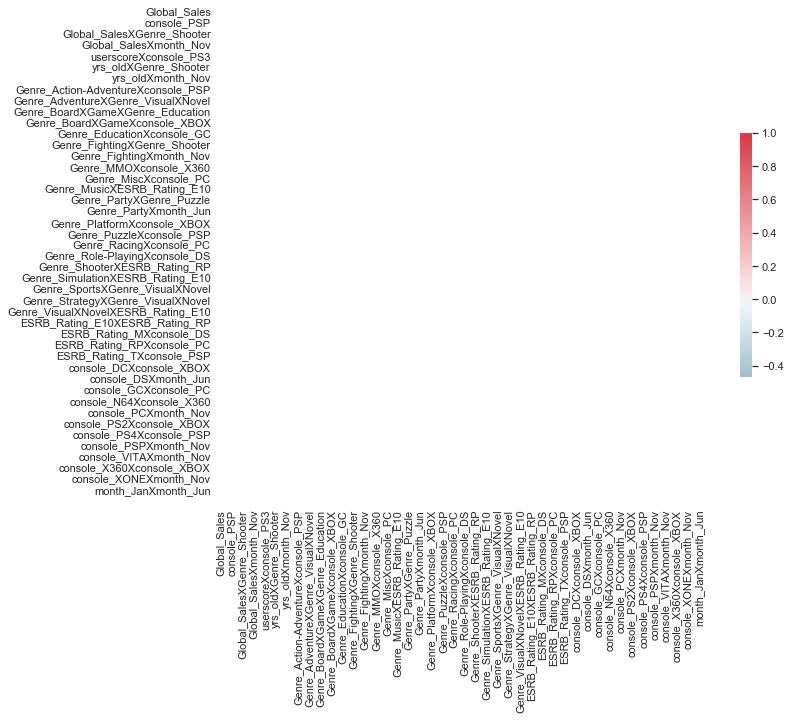

In [552]:

sns.set(style="white")


# Compute the correlation matrix
corr2 = X_train_poly2.corr()

# Generate a mask for the upper triangle
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure
f2, ax2 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap2 = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask2, cmap=cmap2, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [553]:
len(X_train_poly2.columns)

1539

In [554]:
# Find index of feature columns with correlation greater than 0.90
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.90)]
X_train_poly2.drop(columns=to_drop2, inplace=True)
X_test_poly2.drop(columns=to_drop2, inplace=True)


In [555]:
len(X_train_poly2.columns)

1390

In [386]:
X_train_poly2.columns

Index(['Global_Sales', 'userscore', 'yrs_old', 'Genre_Action-Adventure',
       'Genre_Adventure', 'Genre_Board Game', 'Genre_Education',
       'Genre_Fighting', 'Genre_MMO', 'Genre_Misc', 'Genre_Music',
       'Genre_Party', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Genre_Visual Novel',
       'ESRB_Rating_E10', 'ESRB_Rating_M', 'ESRB_Rating_RP', 'ESRB_Rating_T',
       'console_DC', 'console_DS', 'console_GBA', 'console_GC', 'console_N64',
       'console_PC', 'console_PS', 'console_PS2', 'console_PS3', 'console_PS4',
       'console_PSP', 'console_Switch', 'console_VITA', 'console_WII',
       'console_WIIU', 'console_X360', 'console_XBOX', 'console_XONE',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep'],
      dtype='object')

In [556]:
lm2=LinearRegression()
lm2=lm2.fit(X_train_poly2,y_train2)

y_pred_train2=lm2.predict(X_train_poly2)
y_pred2=lm2.predict(X_test_poly2)

train_rmse2=np.sqrt(metrics.mean_squared_error(y_train2,y_pred_train2))
test_rmse2=np.sqrt(metrics.mean_squared_error(y_test2,y_pred2))

print('Training Error RMSE: '+ str(train_rmse2) )
print('Testing Error RMSE: '+ str(test_rmse2) )

Training Error RMSE: 8.525331003411805
Testing Error RMSE: 21205981069.951794


In [388]:
lm2_coef01 = pd.DataFrame(data=lm2.coef_).T
lm2_coef01.columns = X_train_poly2.columns
lm2_coef01 = lm2_coef01.T.sort_values(by=0).T
lm2_coef01.T

,0
Genre_Board Game,-13.103888
console_WII,-3.925366
Genre_Party,-2.925833
console_DS,-1.950897
console_PS2,-1.898740
console_PSP,-1.132728
ESRB_Rating_RP,-0.599524
yrs_old,-0.263139
console_PS,-0.257766
month_Jan,-0.206877


### Running Kbest and Lasso with correlation filtering

In [577]:
# Select K best features
selector2 = SelectKBest(f_regression, k=89)

selector2.fit(X_train_poly2, y_train2)

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=89, score_func=<function f_regression at 0x000001F0CADCBCA8>)

In [578]:
selected_columns2 = X_train_poly2.columns[selector2.get_support()]
removed_columns2 = X_train_poly2.columns[~selector2.get_support()]

In [579]:
#instantiate a linear regression object
lm_kbest2 = LinearRegression()

#fit the linear regression to the data
lm_kbest2 = lm_kbest2.fit(X_train_poly2[selected_columns2], y_train2)

y_train_kbest2 = lm_kbest2.predict(X_train_poly2[selected_columns2])


trainK_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_kbest2))


print('Training Root Mean Squared Error:' , trainK_rmse2)

y_kbest2 = lm_kbest2.predict(X_test_poly2[selected_columns2])

testK_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_kbest2))

print('Testing Root Mean Squared Error:' , testK_rmse2)


Training Root Mean Squared Error: 9.279482048415108
Testing Root Mean Squared Error: 9.911736612854178


In [561]:
selected_columns2

Index(['Global_Sales', 'userscore', 'Genre_Sports', 'Global_Sales^2',
       'Global_SalesXyrs_old', 'Global_SalesXGenre_Role-Playing',
       'Global_SalesXGenre_Shooter', 'Global_SalesXGenre_Sports',
       'Global_SalesXESRB_Rating_M', 'Global_SalesXESRB_Rating_T',
       'Global_SalesXconsole_PS2', 'Global_SalesXconsole_PS3',
       'Global_SalesXconsole_X360', 'Global_SalesXconsole_XBOX',
       'Global_SalesXmonth_Oct'],
      dtype='object')

In [393]:
lm_kbest2_coef01 = pd.DataFrame(data=lm_kbest2.coef_).T
lm_kbest2_coef01.columns = X_train_poly2[selected_columns2].columns
lm_kbest2_coef01 = lm_kbest2_coef01.T.sort_values(by=0).T
lm_kbest2_coef01.T

,0
console_WII,-4.310557
console_DS,-2.054001
month_Nov,-0.740150
yrs_old,-0.329664
ESRB_Rating_M,-0.099116
ESRB_Rating_E10,0.046807
Genre_Role-Playing,1.551576
month_Sep,1.614297
console_PS4,2.303588
Global_Sales,3.380823


In [409]:
ols2 = linear_model.LinearRegression()

In [410]:
# Create recursive feature eliminator that scores features by mean squared errors
selector2 = RFECV(estimator=ols2, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector2.fit(X_train_poly2, y_train2)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [411]:
selected_rfe2 = X_train_poly2.columns[selector2.support_]
removed_rfe2 = X_train_poly2.columns[~selector2.support_]


In [412]:
#instantiate a linear regression object
lm_rfe2 = LinearRegression()

#fit the linear regression to the data
lm_rfe2 = lm_rfe2.fit(X_train_poly2[selected_rfe2], y_train2)

y_rfe2 = lm_rfe2.predict(X_train_poly2[selected_rfe2])


trainRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_rfe2))


print('Training Root Mean Squared Error:' , trainRFE_rmse2)

y_pred_rfe2 = lm_rfe2.predict(X_test_poly2[selected_rfe2])

testRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_rfe2))

print('Testing Root Mean Squared Error:' , testRFE_rmse2)


Training Root Mean Squared Error: 9.492931292339149
Testing Root Mean Squared Error: 10.032268144173955


In [413]:
len(selected_rfe2)

51

In [414]:
removed_rfe2

Index(['ESRB_Rating_T', 'console_GBA', 'month_May'], dtype='object')

In [415]:
lm_rfe2_coef01 = pd.DataFrame(data=lm_rfe2.coef_).T
lm_rfe2_coef01.columns = X_train_poly2[selected_rfe2].columns
lm_rfe2_coef01 = lm_rfe2_coef01.T.sort_values(by=0).T
lm_rfe2_coef01.T

,0
Genre_Board Game,-13.072178
console_WII,-3.984240
Genre_Party,-2.926782
console_DS,-2.003938
console_PS2,-1.971163
console_PSP,-1.198254
ESRB_Rating_RP,-0.561757
console_PS,-0.328472
yrs_old,-0.261260
month_Nov,-0.199514


In [580]:
lasso2 = Lasso(alpha=0.001, normalize=False)

lasso2.fit(X_train_poly2,y_train2)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [581]:
y_train_pred2 = lasso2.predict(X_train_poly2)

train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

y_pred2 = lasso2.predict(X_test_poly2)

test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
print('Training Error: '+ str(train_rmse_new2) )
print('Testing Error: '+ str(test_rmse_new2) )

Training Error: 8.59720558075848
Testing Error: 9.813560615515888


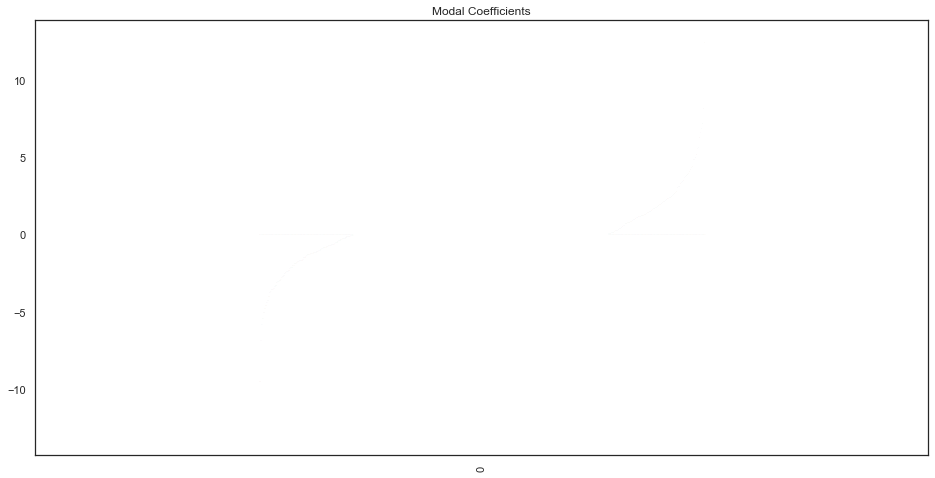

In [582]:
lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
lasso2_coef01.columns = X_train_poly2.columns
lasso2_coef01 = lasso2_coef01.T.sort_values(by=0).T
lasso2_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [583]:
lasso2_coef01.shape

(1, 1390)

In [584]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
len(X2_lasso)

603

In [586]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 and i<3:
    #Make alpha less strict to decrease number of features
    lasso2 = Lasso(alpha=0.01, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 9.008466628517025
Testing Error: 9.724164271614738
# of Features Used: 193

Training Error: 9.008465995004242
Testing Error: 9.724167379352691
# of Features Used: 193

Training Error: 9.008465995004242
Testing Error: 9.724167379352691
# of Features Used: 193



In [587]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 and i<3:
    #Make alpha less strict to decrease number of features
    lasso2 = Lasso(alpha=0.1, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 9.532745899298847
Testing Error: 10.011170936804207
# of Features Used: 31



In [589]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 or i<1:
    #Make alpha smaller to get a better fit
    lasso2 = Lasso(alpha=0.001, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 9.416005391767431
Testing Error: 9.989990066162804
# of Features Used: 31



In [590]:
lasso2_coef01.T[lasso2_coef01.T[0]!=0]

,0
console_WII,-3.977796
console_PS2,-2.614875
console_DS,-2.170767
yrs_oldXconsole_XONE,-0.732211
Global_SalesXmonth_Oct,-0.526188
Global_Sales^2,-0.353022
yrs_oldXconsole_PS4,0.604308
Global_SalesXconsole_WII,-1.181839
yrs_oldXmonth_Jul,-0.028038
yrs_oldXmonth_Aug,0.082186


### Running Kbest and Lasso without correlation filtering(original polynomial features)

In [635]:
# Select K best features
selector2 = SelectKBest(f_regression, k=45)

selector2.fit(X_train_poly2, y_train2)

C:\Users\Drago\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Drago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=45, score_func=<function f_regression at 0x000001F0CADCBCA8>)

In [636]:
selected_columns2 = X_train_poly2.columns[selector2.get_support()]
removed_columns2 = X_train_poly2.columns[~selector2.get_support()]

In [637]:
#instantiate a linear regression object
lm_kbest2 = LinearRegression()

#fit the linear regression to the data
lm_kbest2 = lm_kbest2.fit(X_train_poly2[selected_columns2], y_train2)

y_train_kbest2 = lm_kbest2.predict(X_train_poly2[selected_columns2])


trainK_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_kbest2))


print('Training Root Mean Squared Error:' , trainK_rmse2)

y_kbest2 = lm_kbest2.predict(X_test_poly2[selected_columns2])

testK_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_kbest2))

print('Testing Root Mean Squared Error:' , testK_rmse2)


Training Root Mean Squared Error: 9.41476270124161
Testing Root Mean Squared Error: 9.842440947267963


In [638]:
selected_columns2

Index(['Global_Sales', 'userscore', 'Genre_Sports', 'console_DS', 'console_PC',
       'console_WII', 'Global_Sales^2', 'Global_SalesXuserscore',
       'Global_SalesXyrs_old', 'Global_SalesXGenre_Role-Playing',
       'Global_SalesXGenre_Shooter', 'Global_SalesXGenre_Sports',
       'Global_SalesXESRB_Rating_M', 'Global_SalesXESRB_Rating_T',
       'Global_SalesXconsole_PC', 'Global_SalesXconsole_PS2',
       'Global_SalesXconsole_PS3', 'Global_SalesXconsole_PS4',
       'Global_SalesXconsole_X360', 'Global_SalesXconsole_XBOX',
       'Global_SalesXconsole_XONE', 'Global_SalesXmonth_Aug',
       'Global_SalesXmonth_Feb', 'Global_SalesXmonth_Mar',
       'Global_SalesXmonth_Nov', 'Global_SalesXmonth_Oct',
       'Global_SalesXmonth_Sep', 'userscore^2', 'userscoreXyrs_old',
       'userscoreXGenre_Role-Playing', 'userscoreXGenre_Sports',
       'userscoreXESRB_Rating_M', 'userscoreXconsole_PC',
       'userscoreXconsole_PS4', 'userscoreXmonth_Sep', 'yrs_oldXGenre_Sports',
       'yrs_ol

In [639]:
lm_kbest2_coef01 = pd.DataFrame(data=lm_kbest2.coef_).T
lm_kbest2_coef01.columns = X_train_poly2[selected_columns2].columns
lm_kbest2_coef01 = lm_kbest2_coef01.T.sort_values(by=0).T
lm_kbest2_coef01.T

,0
userscoreXGenre_Sports,-1.002106
Global_SalesXconsole_PS2,-0.961328
console_WII^2,-0.800999
console_WII,-0.800999
Global_SalesXGenre_Shooter,-0.573643
Global_SalesXGenre_Role-Playing,-0.479554
Global_SalesXuserscore,-0.392352
Global_Sales^2,-0.311104
userscoreXconsole_PC,-0.292001
yrs_oldXconsole_WII,-0.250070


In [409]:
ols2 = linear_model.LinearRegression()

In [410]:
# Create recursive feature eliminator that scores features by mean squared errors
selector2 = RFECV(estimator=ols2, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector2.fit(X_train_poly2, y_train2)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [411]:
selected_rfe2 = X_train_poly2.columns[selector2.support_]
removed_rfe2 = X_train_poly2.columns[~selector2.support_]


In [412]:
#instantiate a linear regression object
lm_rfe2 = LinearRegression()

#fit the linear regression to the data
lm_rfe2 = lm_rfe2.fit(X_train_poly2[selected_rfe2], y_train2)

y_rfe2 = lm_rfe2.predict(X_train_poly2[selected_rfe2])


trainRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_rfe2))


print('Training Root Mean Squared Error:' , trainRFE_rmse2)

y_pred_rfe2 = lm_rfe2.predict(X_test_poly2[selected_rfe2])

testRFE_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_rfe2))

print('Testing Root Mean Squared Error:' , testRFE_rmse2)


Training Root Mean Squared Error: 9.492931292339149
Testing Root Mean Squared Error: 10.032268144173955


In [413]:
len(selected_rfe2)

51

In [414]:
removed_rfe2

Index(['ESRB_Rating_T', 'console_GBA', 'month_May'], dtype='object')

In [415]:
lm_rfe2_coef01 = pd.DataFrame(data=lm_rfe2.coef_).T
lm_rfe2_coef01.columns = X_train_poly2[selected_rfe2].columns
lm_rfe2_coef01 = lm_rfe2_coef01.T.sort_values(by=0).T
lm_rfe2_coef01.T

,0
Genre_Board Game,-13.072178
console_WII,-3.984240
Genre_Party,-2.926782
console_DS,-2.003938
console_PS2,-1.971163
console_PSP,-1.198254
ESRB_Rating_RP,-0.561757
console_PS,-0.328472
yrs_old,-0.261260
month_Nov,-0.199514


In [641]:
lasso2 = Lasso(alpha=0.001, normalize=False, max_iter=10000)

lasso2.fit(X_train_poly2,y_train2)

# y_train_pred = lasso.predict(X_train)

# train_rmse_new = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
# print('Training Error ' + str(train_rmse))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [642]:
y_train_pred2 = lasso2.predict(X_train_poly2)

train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

y_pred2 = lasso2.predict(X_test_poly2)

test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
print('Training Error: '+ str(train_rmse_new2) )
print('Testing Error: '+ str(test_rmse_new2) )

Training Error: 8.318577148610688
Testing Error: 9.549652952678384


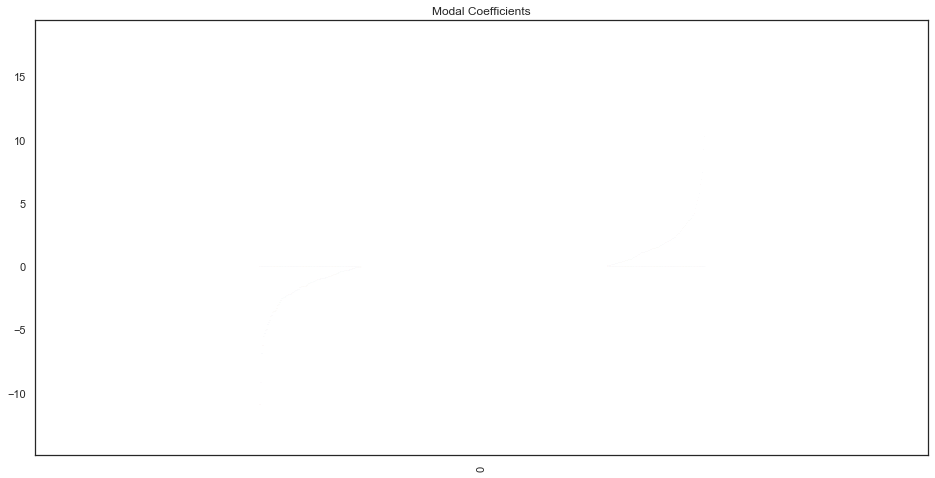

In [643]:
lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
lasso2_coef01.columns = X_train_poly2.columns
lasso2_coef01 = lasso2_coef01.T.sort_values(by=0).T
lasso2_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [644]:
lasso2_coef01.shape

(1, 1539)

In [645]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
len(X2_lasso)

704

In [646]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 and i<3:
    #Make alpha greater to decrease number of features
    lasso2 = Lasso(alpha=0.01, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 8.779038247400809
Testing Error: 9.500061618349408
# of Features Used: 240

Training Error: 8.779039716204117
Testing Error: 9.500060323922687
# of Features Used: 240

Training Error: 8.779039716204117
Testing Error: 9.500060323922687
# of Features Used: 240



In [647]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 and i<3:
    #Make alpha greater to decrease number of features
    lasso2 = Lasso(alpha=0.1, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 9.239395951355133
Testing Error: 9.703446336498349
# of Features Used: 57



In [648]:
X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
i=0
while len(X2_lasso)>100 or i<1:
    #Make alpha smaller to get a better fit
    lasso2 = Lasso(alpha=0.001, normalize=False, max_iter=10000)

    lasso2.fit(X_train_poly2[X2_lasso],y_train2)
    y_train_pred2 = lasso2.predict(X_train_poly2[X2_lasso])

    train_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

    y_pred2 = lasso2.predict(X_test_poly2[X2_lasso])

    test_rmse_new2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
    print('Training Error: '+ str(train_rmse_new2) )
    print('Testing Error: '+ str(test_rmse_new2) )
    lasso2_coef01 = pd.DataFrame(data=lasso2.coef_).T
    lasso2_coef01.columns = X_train_poly2[X2_lasso].columns
    X2_lasso=lasso2_coef01.T[lasso2_coef01.T[0]!=0].T.columns
    i+=1
    print('# of Features Used: '+ str(len(X2_lasso))+'\n')

Training Error: 9.206593478035824
Testing Error: 9.692127684417803
# of Features Used: 57



In [649]:
lasso2_coef01.T[lasso2_coef01.T[0]!=0]

,0
yrs_old,-2.015377
userscoreXconsole_PS2,-1.183730
userscoreXconsole_PS,-0.321094
userscoreXmonth_Oct,-0.299784
yrs_oldXconsole_XBOX,0.163090
userscoreXmonth_Sep,0.188069
yrs_oldXconsole_WII,-0.390445
userscoreXconsole_PSP,-0.310889
yrs_oldXconsole_PSP,0.148628
yrs_oldXconsole_DS,-0.116098
